# Fake News Classifier

In [1]:
# First import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import string
import sys  
from datetime import datetime

# Data Cleaning

In [ ]:
fake_news = pd.read_csv('Fake.csv')

# Represent True/False with numbers, all False news set to 0
fake_news['True/False'] = 0
fake_news.head()

,title,text,subject,date,True/False
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  True/False  
0  December 31, 2017           0  
1  December 31, 2017           0  
2  December 30, 2017           0  
3  December 29, 2017           0  
4  December 25, 2017           0  

In [ ]:
true_news = pd.read_csv('True.csv')

# Representing True/False with numbers, all True news set to 1
true_news['True/False'] = 1
true_news.describe()

,True/False
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


       True/False
count     21417.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0

In [ ]:
# Concatenate both false and true news dataframes 
news = fake_news.append(true_news, ignore_index=True)
news.tail()


/tmp/ipykernel_12381/600879063.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = fake_news.append(true_news, ignore_index=True)





,title,text,subject,date,True/False
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


                                                   title  \
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  True/False  
44893  August 22, 2017            1  
44894  August 22, 2017            1  
44895  August 22, 2017            1  
44896  August 22, 2017            1  
44897  August 22, 2017

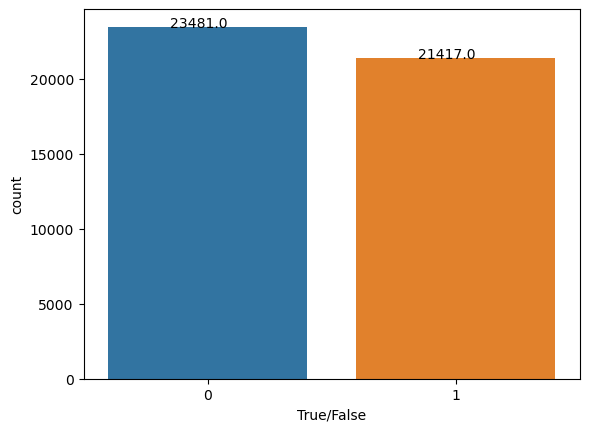

<Figure size 640x480 with 1 Axes>

In [ ]:
# Plotting countplot to display the numbers of true and false news
ax=sb.countplot(data=news, x=news["True/False"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [ ]:
# Cleaning the News Dataset

## Information Leak 1: 
Analysing the dataset, we found that 99.2% of the true news contains the word "(Reuters)" and this can lead to flawed accuracy. Hence we will be doing basic natural language processing cleaning by formating the text.

In [ ]:
print(true_news.text.str.contains("\(Reuters\)").mean()*100,"%")

99.20623803520567 %


In [ ]:
# Removing all instances of '(Reuters)'
news['text'] = news['text'].replace('\(Reuters\)', '', regex=True)

# Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['text'] = news['text'].replace(' '+letter+' ', ' ', regex=True)

# Expanding all words with contractions
news['text'] = news['text'].replace(' re ', ' are ', regex=True)
news['text'] = news['text'].replace(' ve ', ' have ', regex=True)
news['text'] = news['text'].replace(' ll ', ' will ', regex=True)
news['text'] = news['text'].replace('[^\w\s]+', '', regex=True)

# Removing all numbers
news['text'] = news['text'].str.replace(r'\d+', '',regex=True)

# Removing all extra spaces
news['text'] = news['text'].str.replace('\s+', ' ', regex=True)

# Converting all text and titles to lowercase
news['text']=news['text'].str.lower() 
news['title'] = news['title'].str.lower()
news

,title,text,subject,date,True/False
0,donald trump sends out embarrassing new year’...,donald trump just couldn wish all americans a ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'fully committed' nato backs new u.s. approach...,brussels nato allies on tuesday welcomed presi...,worldnews,"August 22, 2017",1
44894,lexisnexis withdrew two products from chinese ...,london lexisnexis a provider of legal regulato...,worldnews,"August 22, 2017",1
44895,minsk cultural hub becomes haven from authorities,minsk in the shadow of disused sovietera facto...,worldnews,"August 22, 2017",1
44896,vatican upbeat on possibility of pope francis ...,moscow vatican secretary of state cardinal pie...,worldnews,"August 22, 2017",1


                                                   title  \
0       donald trump sends out embarrassing new year’...   
1       drunk bragging trump staffer started russian ...   
2       sheriff david clarke becomes an internet joke...   
3       trump is so obsessed he even has obama’s name...   
4       pope francis just called out donald trump dur...   
...                                                  ...   
44893  'fully committed' nato backs new u.s. approach...   
44894  lexisnexis withdrew two products from chinese ...   
44895  minsk cultural hub becomes haven from authorities   
44896  vatican upbeat on possibility of pope francis ...   
44897  indonesia to buy $1.14 billion worth of russia...   

                                                    text    subject  \
0      donald trump just couldn wish all americans a ...       News   
1      house intelligence committee chairman devin nu...       News   
2      on friday it was revealed that former milwauke...       New

In [ ]:
# Performing the same tasks for titles

# Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['title'] = news['title'].replace(' '+letter+' ', ' ', regex=True)

# Expanding all words with contractions
news['title'] = news['title'].replace(' re ', ' are ', regex=True)
news['title'] = news['title'].replace(' ve ', ' have ', regex=True)
news['title'] = news['title'].replace(' ll ', ' will ', regex=True)
news['title'] = news['title'].replace('[^\w\s]+', '', regex=True)

# Removing all numbers
news['title'] = news['title'].str.replace(r'\d+', '',regex=True)

# Removing all extra spaces
news['title'] = news['title'].str.replace('\s+',' ', regex=True)

news

,title,text,subject,date,True/False
0,donald trump sends out embarrassing new years...,donald trump just couldn wish all americans a ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,fully committed nato backs new us approach on ...,brussels nato allies on tuesday welcomed presi...,worldnews,"August 22, 2017",1
44894,lexisnexis withdrew two products from chinese ...,london lexisnexis a provider of legal regulato...,worldnews,"August 22, 2017",1
44895,minsk cultural hub becomes haven from authorities,minsk in the shadow of disused sovietera facto...,worldnews,"August 22, 2017",1
44896,vatican upbeat on possibility of pope francis ...,moscow vatican secretary of state cardinal pie...,worldnews,"August 22, 2017",1


                                                   title  \
0       donald trump sends out embarrassing new years...   
1       drunk bragging trump staffer started russian ...   
2       sheriff david clarke becomes an internet joke...   
3       trump is so obsessed he even has obamas name ...   
4       pope francis just called out donald trump dur...   
...                                                  ...   
44893  fully committed nato backs new us approach on ...   
44894  lexisnexis withdrew two products from chinese ...   
44895  minsk cultural hub becomes haven from authorities   
44896  vatican upbeat on possibility of pope francis ...   
44897     indonesia to buy billion worth of russian jets   

                                                    text    subject  \
0      donald trump just couldn wish all americans a ...       News   
1      house intelligence committee chairman devin nu...       News   
2      on friday it was revealed that former milwauke...       New

## Information Leak 2: 
Analysing the true and fake news, we noticed that all news before 2016 were fake news and this is a dead giveaway, which can lead to very high accuracy. Also, some date values are filled with URLs instead hence cleaning will be done.

Text(0.5, 1.0, 'Articles published per day')

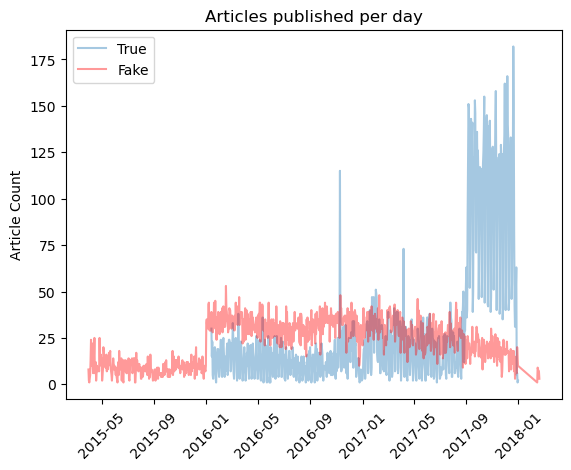

<Figure size 640x480 with 1 Axes>

In [ ]:
# Convert date columns to pandas datatime format
tnews = pd.to_datetime(true_news.date,errors='coerce').value_counts().sort_index()
fnews = pd.to_datetime(fake_news.date,errors='coerce').value_counts().sort_index()

# Observing the distribution of articles across time using a plot
plt.plot(tnews.index,tnews.values,label='True',alpha=0.4)
plt.plot(fnews.index,fnews.values,'red',label='Fake',alpha=0.4)
plt.xticks(rotation=45)
plt.ylabel("Article Count")
plt.legend(loc='upper left')
plt.title("Articles published per day")

In [ ]:
# Analysing the dates, there are a few formats given and hence we will find those empty/dates that does not makes sense.
date_formats = [
    "%B %d, %Y",
    "%B %d, %Y ",
    "%b %d, %Y",
    '%d-%b-%y',
]

In [ ]:
# No missing date values in the dataset
missing_values = news[news['date'].isnull()]
print("Rows with missing date values:", missing_values)

Rows with missing date values: Empty DataFrame
Columns: [title, text, subject, date, True/False]
Index: []


In [ ]:
# We can analyse that 10 news have dates that are invalid. 
# Since it is just a small amount of data, we will be removing them from the dataset.
remove_dates = []
index=0
for dates in news['date']:
    parsed_date = None
    for date_format in date_formats:
        try:
            parsed_date = datetime.strptime(dates, date_format)
            break
        except ValueError:
            pass

    # Check if a valid date was found
    if parsed_date is None:
        print("Unable to parse date:", dates, "\nIndex:", index, "\n")
        remove_dates.append(index)
    index+=1
    
remove_dates

Unable to parse date: https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/ 
Index: 9358 

Unable to parse date: https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/ 
Index: 15507 

Unable to parse date: https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/ 
Index: 15508 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 
Index: 15839 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 
Index: 15840 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 
Index: 17432 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 
Index: 17433 

Unable to parse date: MSNBC HOST Rudely Assumes Steel Worker Would

[9358, 15507, 15508, 15839, 15840, 17432, 17433, 18933, 21869, 21870]

In [ ]:
# Dropping the indexs with invalid dates.
for index in remove_dates:
    news.drop(index, axis=0, inplace=True)

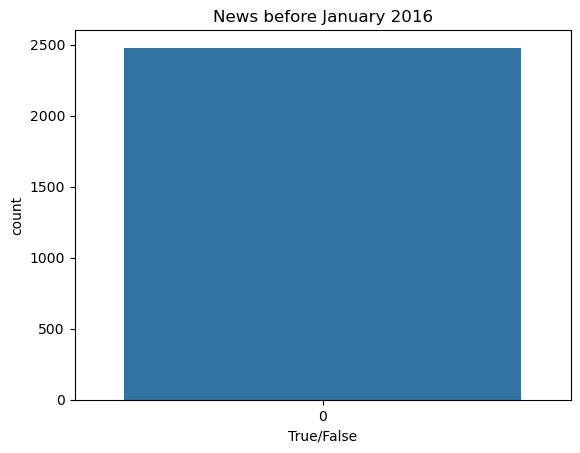

<Figure size 640x480 with 1 Axes>

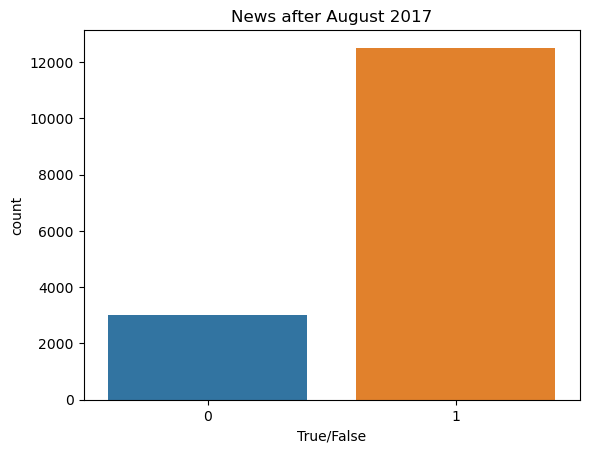

<Figure size 640x480 with 1 Axes>

In [ ]:
# Observing this information leak, we can easily train the model to detect fake/real just by passing in the dates.
#However, today's date will probably not tell us any information about whether a news story published today is real or fake.
#Hence we will not be using dates to perform regression as it can lead to artificially high accuracy.
news['date'] = pd.to_datetime(news['date'])
outliers_left = news[(news['date'] < pd.Timestamp('2016-01-01'))]
outliers_right = news[(news['date'] > pd.Timestamp('2017-08-01'))]

ax=sb.countplot(data=news, x=outliers_left["True/False"]).set(title='News before January 2016')
plt.show()

ax=sb.countplot(data=news, x=outliers_right["True/False"]).set(title='News after August 2017')
plt.show()

## Information Leak 3: 
Analysing the true and fake news, we realised that some news are duplicated. If two duplicates end up in different folds, the same example will be in both the training and test sets, causing the label to be leaked to the training set. The model will be overfitting on these data points and will perform very well on them and which can potentially lead to artificially high accuracy.

In [ ]:
# We observe that there are 209 news that are duplicated, hence we will be dropping them.
news.duplicated().sum()
print("Before removing:")
news.describe()

Before removing:






,True/False
count,44888.000000
mean,0.477121
std,0.499482
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


         True/False
count  44888.000000
mean       0.477121
std        0.499482
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [ ]:
news.drop_duplicates(inplace=True)
print("After removing:")
news.describe()

After removing:






,True/False
count,44676.000000
mean,0.474752
std,0.499368
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


         True/False
count  44676.000000
mean       0.474752
std        0.499368
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

# Exploratory Data Analysis

In [ ]:
# nltk is a suite of libraries and programs for symbolic and statistical natural language processing for English language
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## All News Analysis

In [ ]:
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
news['words_titles'] = news['title'].apply(nltk.word_tokenize)
news['words_titles'] = news['words_titles'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Create a frequency distribution of the words
all_words_title = nltk.FreqDist(news['words_titles'].sum())

# Print the most common words
top_words_title = all_words_title.most_common(10)

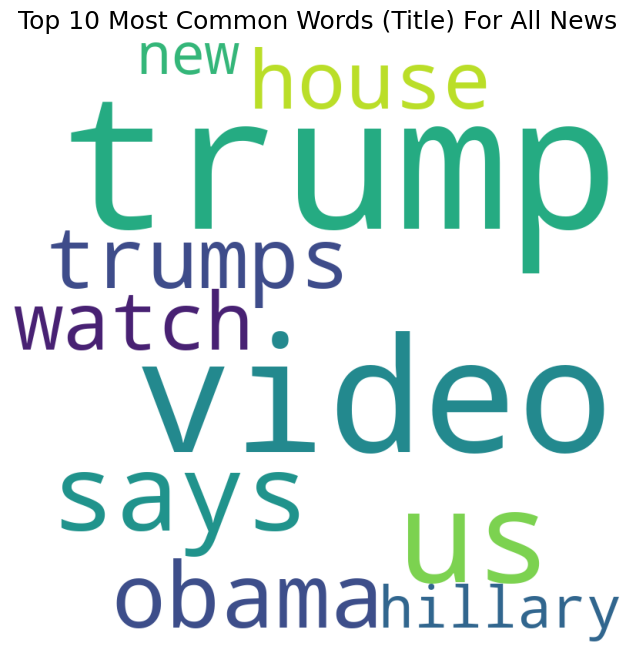

<Figure size 800x800 with 1 Axes>

In [ ]:
# Displaying the top 10 most common words in title for all the news
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_title))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Title) For All News', fontsize=18)
plt.show()

In [ ]:
# Tokenize the text and remove stopwords
news['words_text'] = news['text'].apply(nltk.word_tokenize)
news['words_text'] = news['words_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Create a frequency distribution of the words
all_words_text = nltk.FreqDist(news['words_text'].sum())
# Print the most common words
top_words_text = all_words_text.most_common(10)

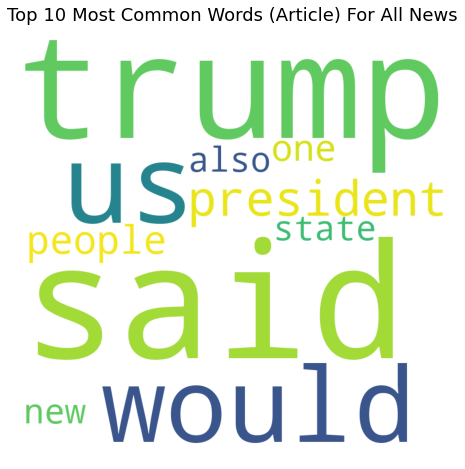

<Figure size 576x576 with 1 Axes>

In [ ]:
# Displaying the top 10 most common words in text for all news
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_text))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Article) For All News', fontsize=18)
plt.show()

## Real News Analysis

In [ ]:
# Tokenize the text and remove stopwords
news['words_titles_true'] = news.apply(lambda x: nltk.word_tokenize(x['title']) if x['True/False'] == 1 else [], axis=1)
news['words_titles_true'] = news['words_titles_true'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Create a frequency distribution of the words
all_words_title_true = nltk.FreqDist(news['words_titles_true'].sum())

# Print the most common words
top_words_title_true = all_words_title_true.most_common(10)

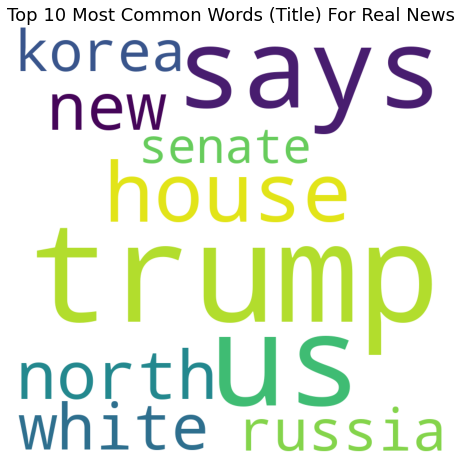

<Figure size 576x576 with 1 Axes>

In [ ]:
# Displaying the top 10 most common words in title for real news
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_title_true))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Title) For Real News', fontsize=18)
plt.show()

In [ ]:
# Tokenize the text and remove stopwords
news['words_text_true'] = news.apply(lambda x: nltk.word_tokenize(x['text']) if x['True/False'] == 1 else [], axis=1)
news['words_text_true'] = news['words_text_true'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Create a frequency distribution of the words
all_words_text_true = nltk.FreqDist(news['words_text_true'].sum())
# Print the most common words
top_words_text_true = all_words_text_true.most_common(10)

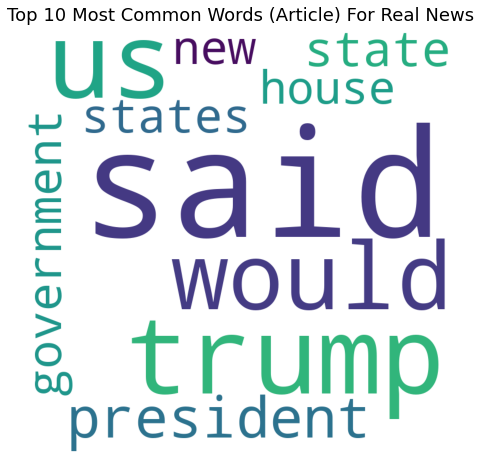

<Figure size 576x576 with 1 Axes>

In [ ]:
# Displaying the top 10 most common words in text for real news
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_text_true))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Article) For Real News', fontsize=18)
plt.show()

## Fake News Analysis

In [ ]:
# Tokenize the text and remove stopwords
news['words_titles_false'] = news.apply(lambda x: nltk.word_tokenize(x['title']) if x['True/False'] == 0 else [], axis=1)
news['words_titles_false'] = news['words_titles_false'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Create a frequency distribution of the words
all_words_title_false = nltk.FreqDist(news['words_titles_false'].sum())

# Print the most common words
top_words_title_false = all_words_title_false.most_common(10)

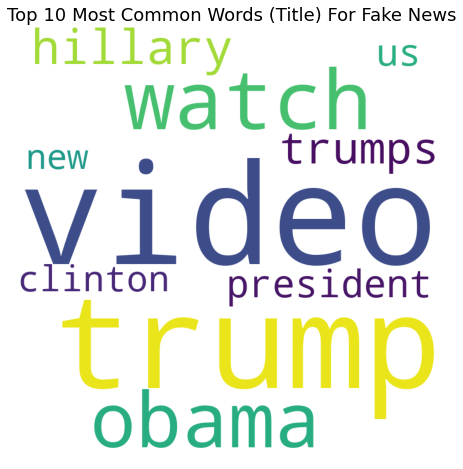

<Figure size 576x576 with 1 Axes>

In [ ]:
# Displaying the top 10 most common words in title for fake news
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_title_false))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Title) For Fake News', fontsize=18)
plt.show()

In [ ]:
# Tokenize the text and remove stopwords
news['words_text_false'] = news.apply(lambda x: nltk.word_tokenize(x['text']) if x['True/False'] == 0 else [], axis=1)
news['words_text_false'] = news['words_text_false'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
# Create a frequency distribution of the words
all_words_text_false = nltk.FreqDist(news['words_text_false'].sum())
# Print the most common words
top_words_text_false = all_words_text_false.most_common(10)

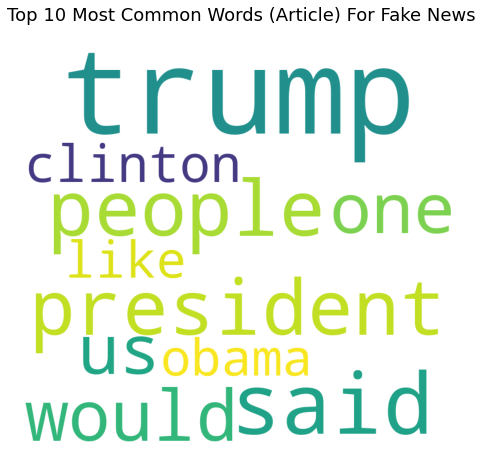

<Figure size 576x576 with 1 Axes>

In [ ]:
# Displaying the top 10 most common words in text for fake news
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_text_false))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Article) For Fake News', fontsize=18)
plt.show()

## Subject Analysis

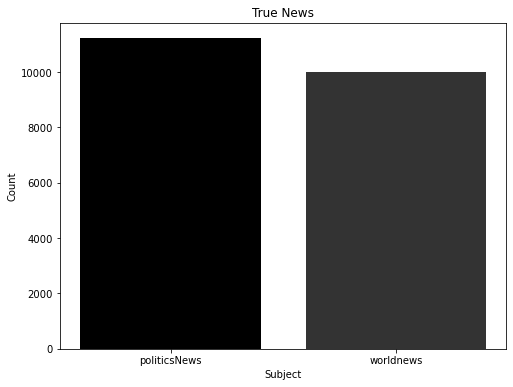

<Figure size 576x432 with 1 Axes>

In [ ]:
# Displaying the different types of true news
plt.figure(figsize=(8, 6))
colors = [(0,0,0), (0.2,0.2,0.2), (0.35,0.35,0.35), (0.5,0.5,0.5), (0.7,0.7,0.7), (0.9,0.9,0.9)]
plt.bar(news.loc[news['True/False'] == 1, 'subject'].value_counts().index, news.loc[news['True/False'] == 1, 'subject'].value_counts().values, color=colors)
plt.title('True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

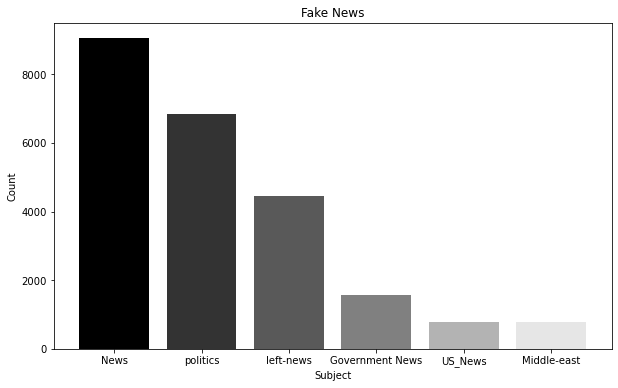

<Figure size 720x432 with 1 Axes>

In [ ]:
# Displaying the different types of fake news
plt.figure(figsize=(10, 6))
plt.bar(news.loc[news['True/False'] == 0, 'subject'].value_counts().index, news.loc[news['True/False'] == 0, 'subject'].value_counts().values, color=colors)
plt.title('Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

## Length Analysis of Text

In [ ]:
# Adding new columns for title length and article length
news['title_length'] = news['title'].apply(len)
news['article_length'] = news['text'].apply(len)
news

,title,text,subject,date,True/False,words_titles,words_text,words_titles_true,words_text_true,words_titles_false,words_text_false,title_length,article_length
0,donald trump sends out embarrassing new years...,donald trump just couldn wish all americans a ...,News,2017-12-31,0,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...",[],[],"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...",77,2588
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",[],[],"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",69,1836
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,2017-12-30,0,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",[],[],"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",88,3301
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News,2017-12-29,0,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...",[],[],"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...",75,2520
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",[],[],"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",70,2288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,fully committed nato backs new us approach on ...,brussels nato allies on tuesday welcomed presi...,worldnews,2017-08-22,1,"[fully, committed, nato, backs, new, us, appro...","[brussels, nato, allies, tuesday, welcomed, pr...","[fully, committed, nato, backs, new, us, appro...","[brussels, nato, allies, tuesday, welcomed, pr...",[],[],57,2680
44894,lexisnexis withdrew two products from chinese ...,london lexisnexis a provider of legal regulato...,worldnews,2017-08-22,1,"[lexisnexis, withdrew, two, products, chinese,...","[london, lexisnexis, provider, legal, regulato...","[lexisnexis, withdrew, two, products, chinese,...","[london, lexisnexis, provider, legal, regulato...",[],[],52,760
44895,minsk cultural hub becomes haven from authorities,minsk in the shadow of disused sovietera facto...,worldnews,2017-08-22,1,"[minsk, cultural, hub, becomes, authorities]","[minsk, shadow, disused, sovietera, factories,...","[minsk, cultural, hub, becomes, authorities]","[minsk, shadow, disused, sovietera, factories,...",[],[],49,1849
44896,vatican upbeat on possibility of pope francis ...,moscow vatican secretary of state cardinal pie...,worldnews,2017-08-22,1,"[vatican, upbeat, possibility, pope, francis, ...","[moscow, vatican, secretary, state, cardinal, ...","[vatican, upbeat, possibility, pope, francis, ...","[moscow, vatican, secretary, state, cardinal, ...",[],[],61,1152


                                                   title  \
0       donald trump sends out embarrassing new years...   
1       drunk bragging trump staffer started russian ...   
2       sheriff david clarke becomes an internet joke...   
3       trump is so obsessed he even has obamas name ...   
4       pope francis just called out donald trump dur...   
...                                                  ...   
44893  fully committed nato backs new us approach on ...   
44894  lexisnexis withdrew two products from chinese ...   
44895  minsk cultural hub becomes haven from authorities   
44896  vatican upbeat on possibility of pope francis ...   
44897     indonesia to buy billion worth of russian jets   

                                                    text    subject  \
0      donald trump just couldn wish all americans a ...       News   
1      house intelligence committee chairman devin nu...       News   
2      on friday it was revealed that former milwauke...       New

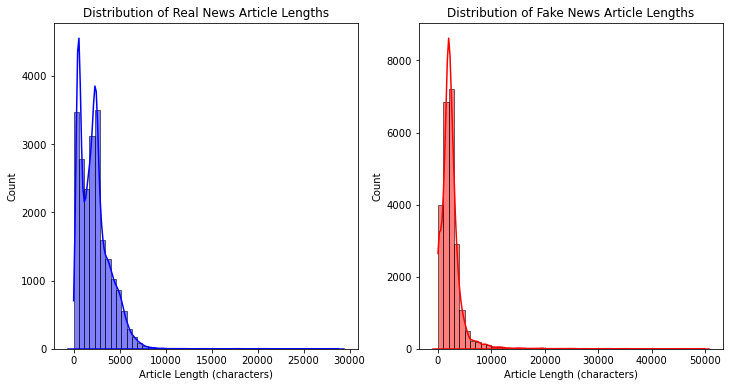

<Figure size 864x432 with 2 Axes>

In [ ]:
# We analaysed that article length for both real and fake news are skewed to the right.
real_news = news[news['True/False'] == 1]
fake_news = news[news['True/False'] == 0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(real_news['article_length'], bins=50, kde=True, color='blue')
sb.kdeplot(real_news['article_length'], color='blue')
plt.title('Distribution of Real News Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sb.histplot(fake_news['article_length'], bins=50, kde=True, color='red')
sb.kdeplot(fake_news['article_length'], color='red')
plt.title('Distribution of Fake News Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Count')

plt.show()

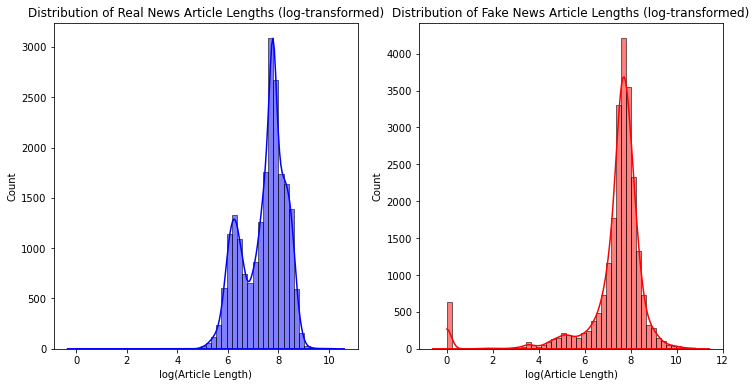

<Figure size 864x432 with 2 Axes>

In [ ]:
# To correct right skewness, we can apply log trasnformation to the data. 
# This will compress the long tail of the distribution and bring the data more towards the center of the plot.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(np.log(real_news['article_length']), bins=50, kde=True, color='blue')
sb.kdeplot(np.log(real_news['article_length']), color='blue')
plt.title('Distribution of Real News Article Lengths (log-transformed)')
plt.xlabel('log(Article Length)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sb.histplot(np.log(fake_news['article_length']), bins=50, kde=True, color='red')
sb.kdeplot(np.log(fake_news['article_length']), color='red')
plt.title('Distribution of Fake News Article Lengths (log-transformed)')
plt.xlabel('log(Article Length)')
plt.ylabel('Count')

plt.show()

In [ ]:
real_news['article_length'].describe()

count    21210.000000
mean      2277.687930
std       1619.253163
min          1.000000
25%        862.000000
50%       2122.000000
75%       3096.000000
max      28758.000000
Name: article_length, dtype: float64

In [ ]:
fake_news['article_length'].describe()

count    23466.000000
mean      2441.683627
std       2429.683994
min          1.000000
25%       1375.000000
50%       2077.000000
75%       2900.000000
max      49818.000000
Name: article_length, dtype: float64

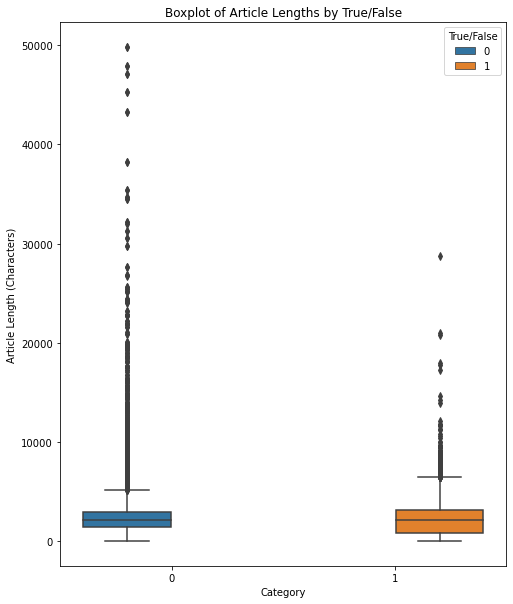

<Figure size 576x720 with 1 Axes>

In [ ]:
# Plot the boxplot of article lengths for true and false news
plt.figure(figsize=(8, 10))
sb.boxplot(x='True/False', y='article_length', data=news, hue='True/False')
plt.title('Boxplot of Article Lengths by True/False')
plt.xlabel('Category')
plt.ylabel('Article Length (Characters)')
plt.show()

## Length Analysis of Title

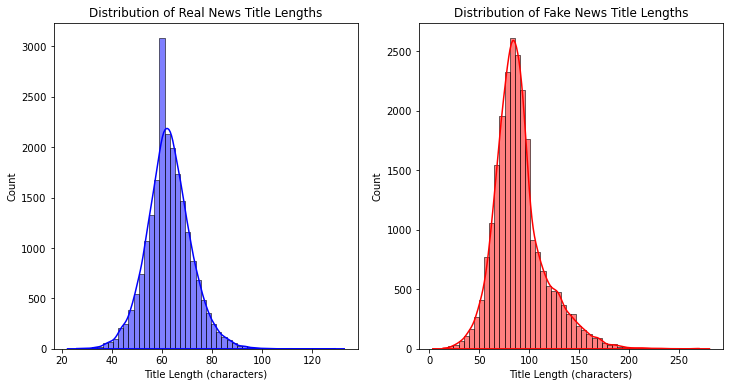

<Figure size 864x432 with 2 Axes>

In [ ]:
#We analaysed that the title length for both real and fake news are rather normally distributed.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(real_news['title_length'], bins=50, kde=True, color='blue')
sb.kdeplot(real_news['title_length'], color='blue')
plt.title('Distribution of Real News Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sb.histplot(fake_news['title_length'], bins=50, kde=True, color='red')
sb.kdeplot(fake_news['title_length'], color='red')
plt.title('Distribution of Fake News Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Count')

plt.show()

In [ ]:
real_news['title_length'].describe()

count    21210.000000
mean        62.748939
std          8.979685
min         26.000000
25%         57.000000
50%         63.000000
75%         68.000000
max        129.000000
Name: title_length, dtype: float64

In [ ]:
fake_news['title_length'].describe()

count    23466.000000
mean        90.312196
std         26.039390
min         14.000000
25%         74.000000
50%         86.000000
75%        101.000000
max        270.000000
Name: title_length, dtype: float64

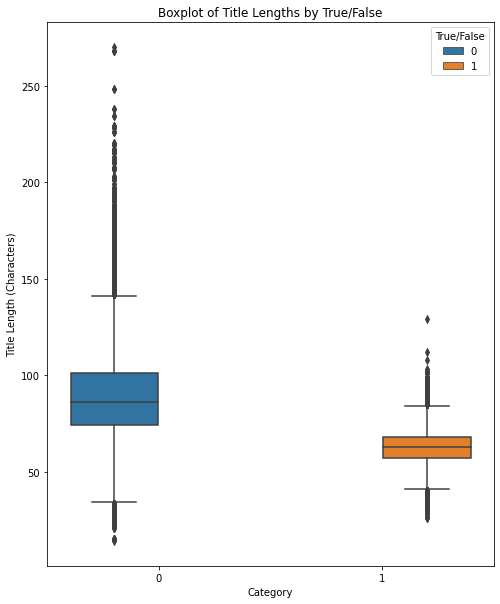

<Figure size 576x720 with 1 Axes>

In [ ]:
# Plot the boxplot of Title Lengths for True and False news
plt.figure(figsize=(8, 10))
sb.boxplot(x='True/False', y='title_length', data=news, hue='True/False')
plt.title('Boxplot of Title Lengths by True/False')
plt.xlabel('Category')
plt.ylabel('Title Length (Characters)')
plt.show()

## Sentimental Analysis of Titles
It is used to understand if the sentiment behind a piece of text is positive, negative or neutral

In [ ]:
from textblob import TextBlob

# get the sentiment score for each article title
def get_sentiment_score(article):
    blob = TextBlob(article)
    return blob.sentiment.polarity

# map the sentiment score to a label
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# apply the function to the 'title' column to get the sentiment scores
news['sentiment_title_score'] = news['title'].apply(get_sentiment_score)

# apply the function to the 'sentiment_score' column to get the sentiment labels
news['sentiment_title_label'] = news['sentiment_title_score'].apply(get_sentiment_label)

# print the first 10 rows of the DataFrame
print(news['sentiment_title_label'][:10])

0    negative
1    negative
2     neutral
3    negative
4     neutral
5    negative
6    positive
7    negative
8     neutral
9    negative
Name: sentiment_title_label, dtype: object


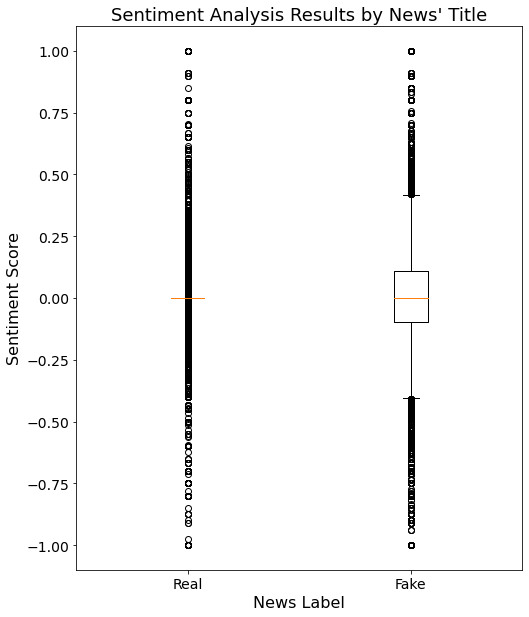

<Figure size 576x720 with 1 Axes>

In [ ]:
# filter the DataFrame by news label
real_news_title = news[news['True/False'] == 1]['sentiment_title_score']
fake_news_title = news[news['True/False'] == 0]['sentiment_title_score']

# create the boxplot
plt.figure(figsize=(8, 10))
plt.boxplot([real_news_title, fake_news_title], labels=['Real', 'Fake'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('News Label', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.title("Sentiment Analysis Results by News' Title", fontsize=18)

# show the plot
plt.show()

In [ ]:
real_news_title.describe()

count    21210.000000
mean         0.024640
std          0.183589
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentiment_title_score, dtype: float64

In [ ]:
fake_news_title.describe()

count    23466.000000
mean         0.002722
std          0.317841
min         -1.000000
25%         -0.095685
50%          0.000000
75%          0.111111
max          1.000000
Name: sentiment_title_score, dtype: float64

## Sentimental Analysis of Text

In [ ]:
# apply the function to the 'text' column to get the sentiment scores
news['sentiment_text_score'] = news['text'].apply(get_sentiment_score)

# apply the function to the 'sentiment_score' column to get the sentiment labels
news['sentiment_text_label'] = news['sentiment_text_score'].apply(get_sentiment_label)

# print the first 10 rows of the DataFrame
print(news['sentiment_text_label'][:10])

0    positive
1    negative
2    positive
3    positive
4    negative
5    positive
6    negative
7    positive
8    positive
9    positive
Name: sentiment_text_label, dtype: object


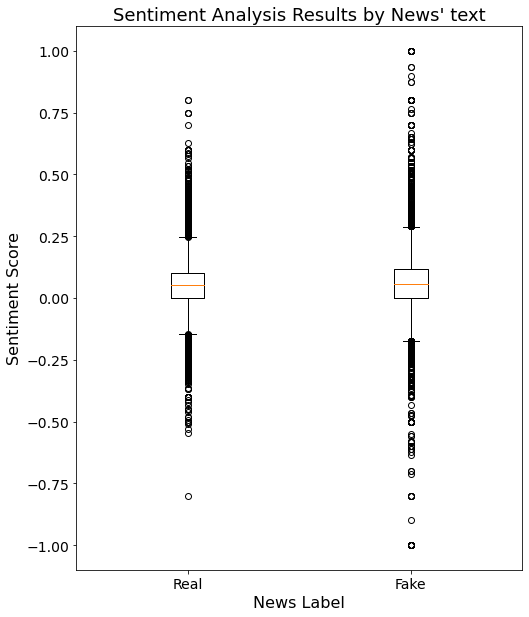

<Figure size 576x720 with 1 Axes>

In [ ]:
# filter the DataFrame by news label
real_news_text = news[news['True/False'] == 1]['sentiment_text_score']
fake_news_text = news[news['True/False'] == 0]['sentiment_text_score']

# create the boxplot
plt.figure(figsize=(8, 10))
plt.boxplot([real_news_text, fake_news_text], labels=['Real', 'Fake'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('News Label', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.title("Sentiment Analysis Results by News' text", fontsize=18)

# show the plot
plt.show()

In [ ]:
real_news_text.describe()

count    21210.000000
mean         0.053899
std          0.092204
min         -0.800000
25%          0.001415
50%          0.052391
75%          0.100340
max          0.800000
Name: sentiment_text_score, dtype: float64

In [ ]:
fake_news_text.describe()

count    23466.000000
mean         0.059442
std          0.114931
min         -1.000000
25%          0.000000
50%          0.055542
75%          0.115681
max          1.000000
Name: sentiment_text_score, dtype: float64

# Machine Learning

## Logistics Regression Using Sentiment Score (Title)

Accuracy: 0.5001119068934646






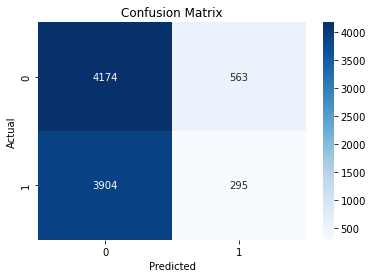

<Figure size 432x288 with 2 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = news['sentiment_title_score']
Y = news['True/False']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
clf = LogisticRegression()

# Train the model
clf.fit(X_train.values.reshape(-1, 1), Y_train)

# Predict on the test set
Y_pred = clf.predict(X_test.values.reshape(-1, 1))

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistics Regression Using Sentiment Score (Text)

Accuracy: 0.525626678603402






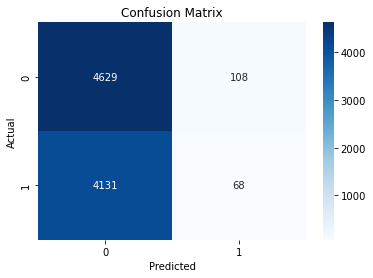

<Figure size 432x288 with 2 Axes>

In [ ]:
X = news['sentiment_text_score']
y = news['True/False']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
clf = LogisticRegression()

# Train the model
clf.fit(X_train.values.reshape(-1, 1), Y_train)

# Predict on the test set
Y_pred = clf.predict(X_test.values.reshape(-1, 1))

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We observe the following accuracy scores when performing Logistic Regression using Sentimental Score

**On title : 50.0%**   
**On text : 52.5%**

The low accuracy scores do not reflect favourable results. It could be due to the following reasons
1) Logistic Regression is not recommended for skewed dataset. Even though we have fixed the skewness greatly, there remains some flaws to it.   
2) Sentimental score is not an important indicator for the veracity of news

## Bag of Words and Logistic Regression on Titles

In [ ]:
# Lets perform Logistic Regression on Title and Text with the help of vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the target variable and the input features
X = news['title']
Y = news['True/False']

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Convert the text data into a bag of words representation
X_bow = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression class
logreg = LogisticRegression(max_iter=100000)

# Train the logistic regression model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = logreg.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9622873769024172
Precision: 0.9463707813222376
Recall: 0.9749940462014766
F1-score: 0.9604692082111437


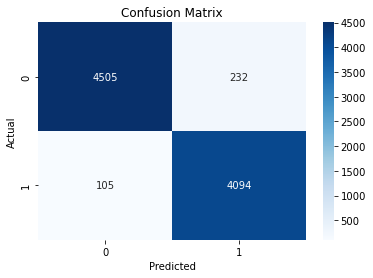

<Figure size 432x288 with 2 Axes>

In [ ]:
# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bag of Words and Logistic Regression on Text

In [ ]:
# Separate the target variable and the input features
X = news['text']
Y = news['True/False']

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Convert the text data into a bag of words representation
X_bow = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression class
logreg = LogisticRegression(max_iter=100000)

# Train the logistic regression model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = logreg.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9908236347358997
Precision: 0.9907032181168057
Recall: 0.9897594665396523
F1-score: 0.9902311174648559


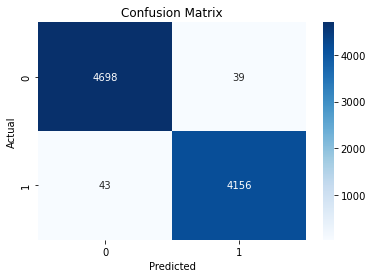

<Figure size 432x288 with 2 Axes>

In [ ]:
# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We observe the following scores when performing Logistic Regression on Title and Text  
  
**On Title : 96.2%  
On Text : 99.1%**  

The high accuracy scores could be attributed to overfitting when we vectorize the texts and titles


## Binary Tree Classification

## Numeric Variables
**Let us analyse the numeric variables first as predictor variables. We will do so through the help of decision trees.**

In [3]:
#we make dataframes for each of the predictor variables we're going to look at as well as the response variable 'True/False'
#Predictor Variables
article_length = pd.DataFrame(news_updated['article_length'])
title_length = pd.DataFrame(news_updated['title_length']) 
sentiment_text_score = pd.DataFrame(news_updated['sentiment_text_score']) 
sentiment_title_score = pd.DataFrame(news_updated['sentiment_title_score'])  

#Response Variable
True_or_False = pd.DataFrame(news_updated['True/False'])

Here we use article_length as a predictor variable to predict whether news is fake or real.

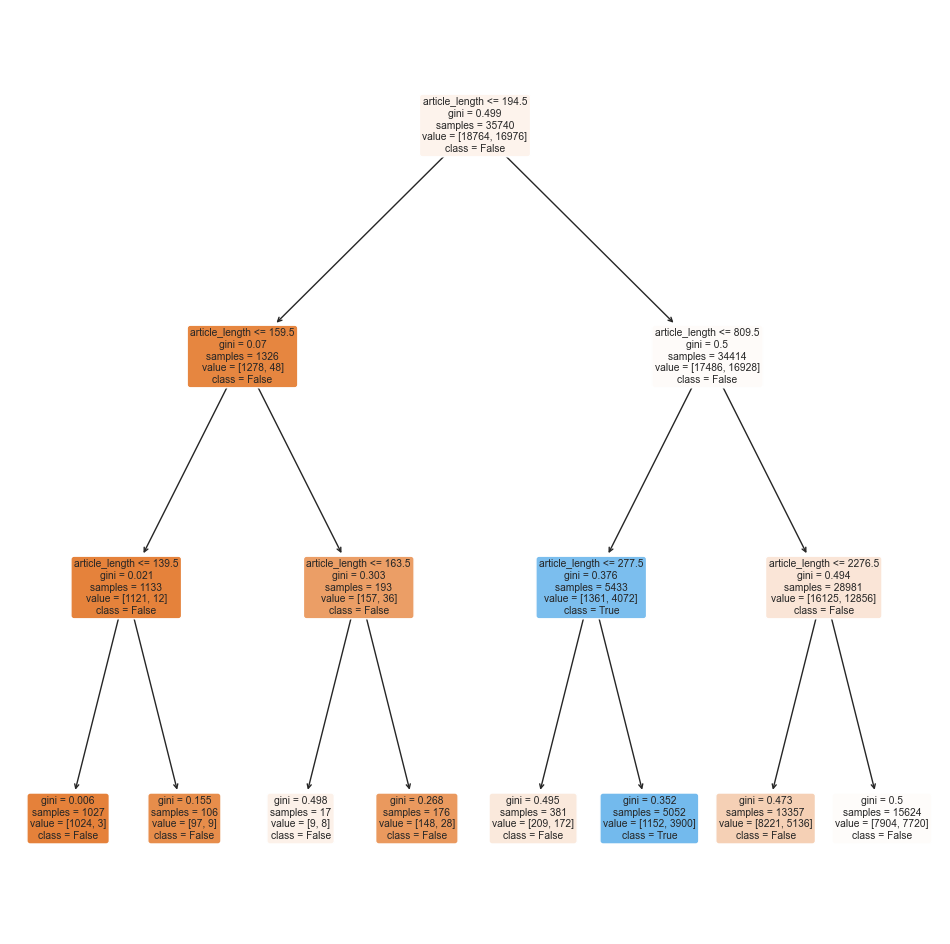

In [4]:
X_train, X_test, y_train, y_test = train_test_split(article_length, True_or_False, test_size=0.2)

dectree1 = DecisionTreeClassifier(max_depth=3) 
dectree1.fit(X_train, y_train)   

f = plt.figure(figsize=(12, 12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["article_length"], 
          class_names=["False","True"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6019026301063235

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6031781557743957



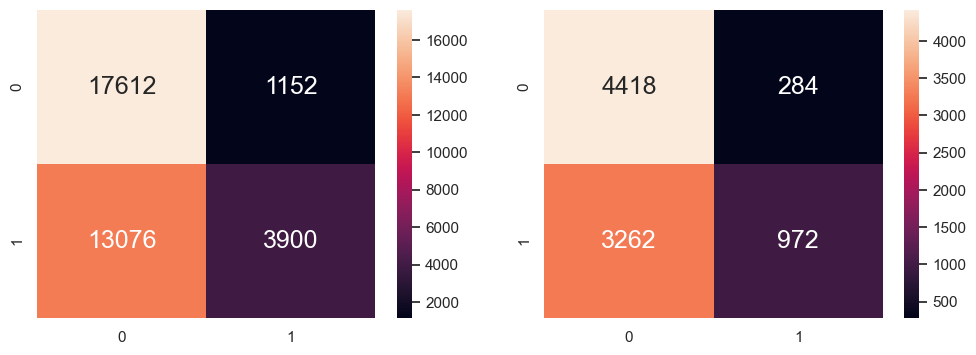

In [5]:
y_train_pred = dectree1.predict(X_train)
y_test_pred = dectree1.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train, y_train))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test, y_test))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [6]:
#this is a function to find the true positive rates and true negative rates of the decision tree models
def analyse(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0][0]
    FN = matrix[1][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print("The true positive rate is ", TPR)
    print("The false positive rate is ",  FPR)
    print()

In [7]:
print("The rates for the train data are:")
analyse(y_train, y_train_pred)
print("The rates for the test data are:")
analyse(y_test, y_test_pred)

The rates for the train data are:
The true positive rate is  0.22973609802073516
The false positive rate is  0.06139415902792582

The rates for the test data are:
The true positive rate is  0.2295701464336325
The false positive rate is  0.0603998298596342



Now we use title_length as a predictor variable to predict whether news is fake or real.

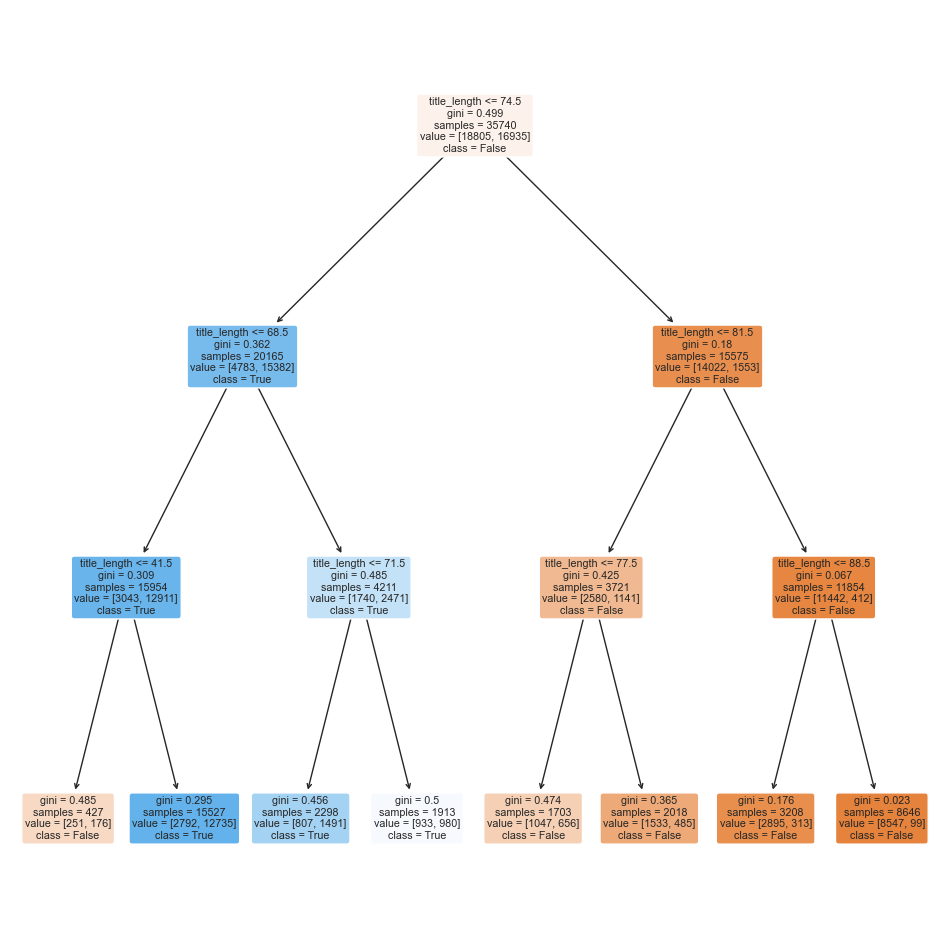

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(title_length, True_or_False, test_size=0.2)

dectree1 = DecisionTreeClassifier(max_depth=3) 
dectree1.fit(X_train2, y_train2)   

f = plt.figure(figsize=(12, 12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["title_length"], 
          class_names=["False","True"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8248181309457191

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.825313339301701



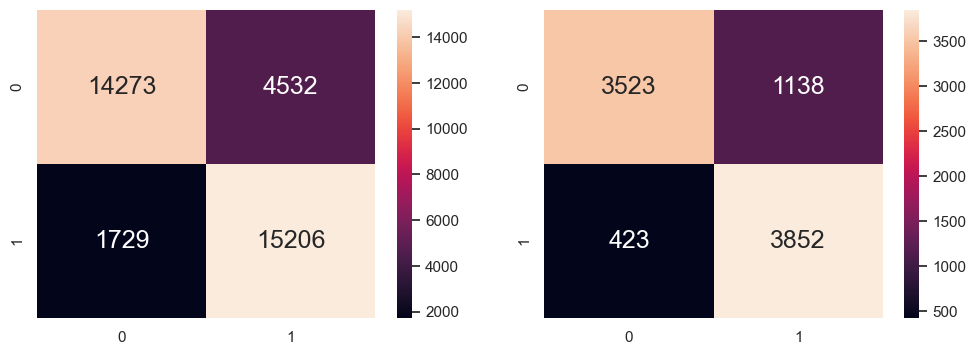

In [9]:
y_train_pred2 = dectree1.predict(X_train2)
y_test_pred2 = dectree1.predict(X_test2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train2, y_train2))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test2, y_test2))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train2, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test2, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [10]:
print("The rates for the train data are:")
analyse(y_train2, y_train_pred2)
print("The rates for the test data are:")
analyse(y_test2, y_test_pred2)

The rates for the train data are:
The true positive rate is  0.8979037496309419
The false positive rate is  0.24099973411326775

The rates for the test data are:
The true positive rate is  0.9010526315789473
The false positive rate is  0.24415361510405492



Now we use sentiment_text_score as a predictor variable to predict whether news is fake or real.

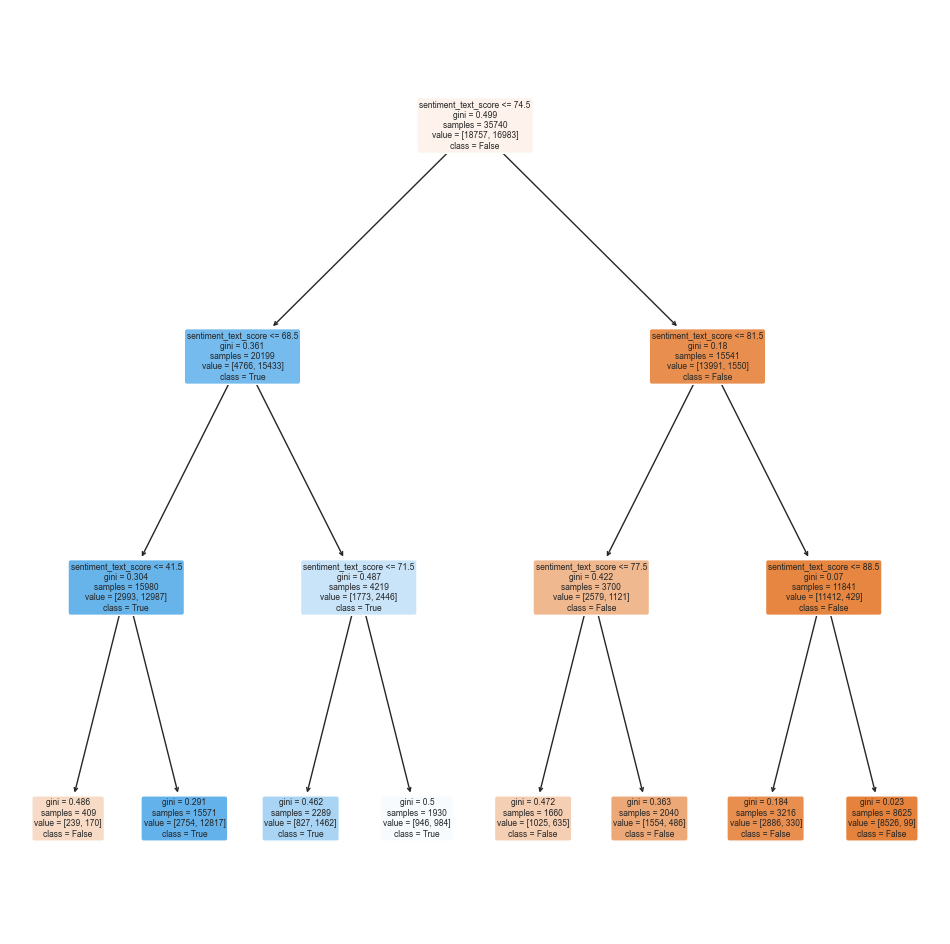

In [21]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(title_length, True_or_False, test_size=0.2)

dectree1 = DecisionTreeClassifier(max_depth=3) 
dectree1.fit(X_train3, y_train3)   

f = plt.figure(figsize=(12, 12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["sentiment_text_score"], 
          class_names=["False","True"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8252098489087857

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8237466427931961



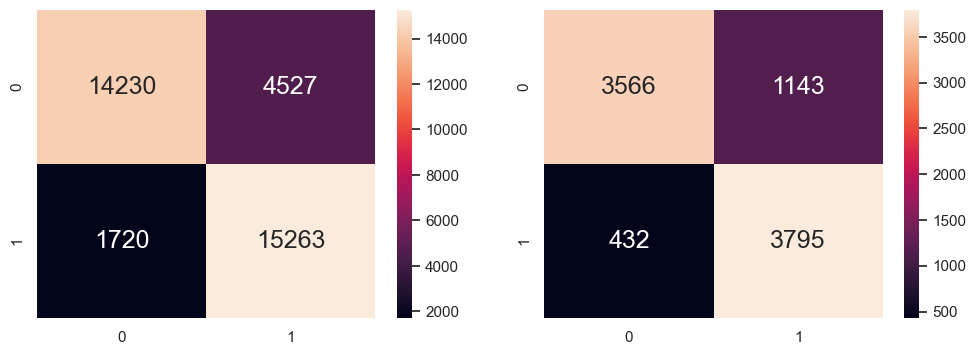

In [22]:
y_train_pred3 = dectree1.predict(X_train3)
y_test_pred3 = dectree1.predict(X_test3)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train3, y_train3))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test3, y_test3))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train3, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test3, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [23]:
print("The rates for the train data are:")
analyse(y_train3, y_train_pred3)
print("The rates for the test data are:")
analyse(y_test3, y_test_pred3)

The rates for the train data are:
The true positive rate is  0.8987222516634281
The false positive rate is  0.24134989603881218

The rates for the test data are:
The true positive rate is  0.8977998580553584
The false positive rate is  0.24272669356551285



Now we use sentiment_title_score as a predictor variable to predict whether news is fake or real.

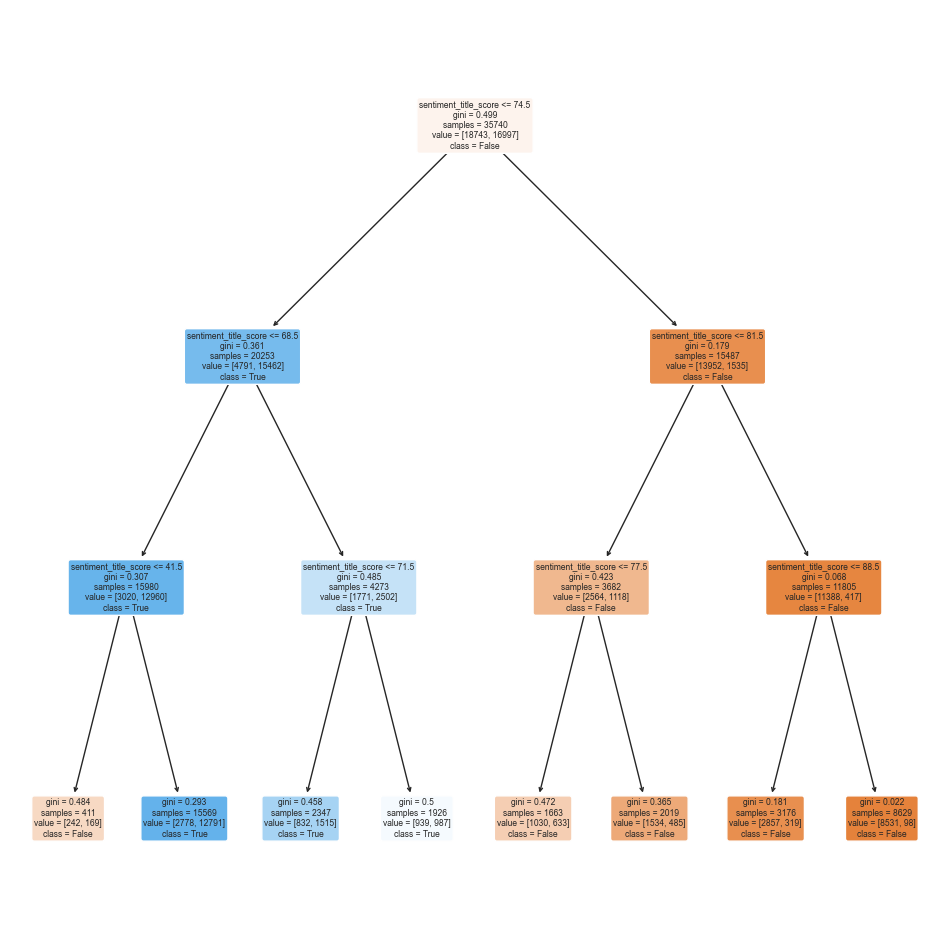

In [24]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(title_length, True_or_False, test_size=0.2)

dectree1 = DecisionTreeClassifier(max_depth=3) 
dectree1.fit(X_train4, y_train4)   

f = plt.figure(figsize=(12, 12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["sentiment_title_score"], 
          class_names=["False","True"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8250419697817571

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8244180841539839



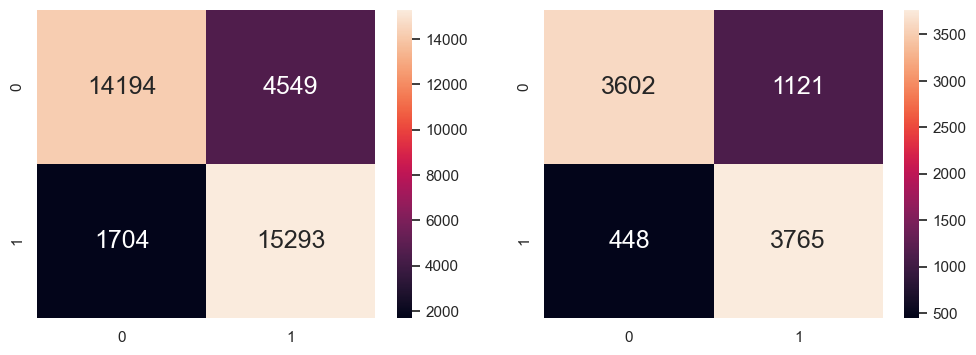

In [25]:
y_train_pred4 = dectree1.predict(X_train4)
y_test_pred4 = dectree1.predict(X_test4)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train4, y_train4))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test4, y_test4))
print()
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train4, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test4, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [26]:
print("The rates for the train data are:")
analyse(y_train4, y_train_pred4)
print("The rates for the test data are:")
analyse(y_test4, y_test_pred4)

The rates for the train data are:
The true positive rate is  0.8997470141789727
The false positive rate is  0.242703942805314

The rates for the test data are:
The true positive rate is  0.893662473296938
The false positive rate is  0.23734914249417743



It is obvious that sentiment_text_score and sentiment_title_score are clearly superior than article_length and title_length in terms of their scores for all the metrics. Here is a quick summary of the 2:

### sentiment_text_score:
<br>
<br>
Classification Accuracy for Train Dataset : 0.8252098489087857
<br>
Classification Accuracy for Test Dataset: 0.8237466427931961
<br>
<br>

**The rates for the train data are:**

<br>
The true positive rate is 0.8987222516634281
<br>
The false positive rate is 0.24099973411326775
<br>
The true negative rate is 0.7590002658867323
<br>
<br>

**The rates for the test data are:**

<br>
The true positive rate is 0.8977998580553584
<br>
The false positive rate is 0.24415361510405492
<br>
The true negative rate is 0.7558463848959451
<br>
<br>
<br>

### sentiment_title_score:
<br>
<br>
Classification Accuracy Train Dataset: 0.8250419697817571
<br>
Classification Accuracy Test Dataset: 0.8244180841539839
<br>
<br>

**The rates for the train data are:**

<br>
The true positive rate is 0.8997470141789727
<br>
The false positive rate is 0.242703942805314
<br>
The true negative rate is 0.757296057194686
<br>
<br>

**The rates for the test data are:**

<br>
The true positive rate is 0.893662473296938
<br>
The false positive rate is 0.23734914249417743
<br>
The true negative rate is 0.7626508575058226

From a quick look at this data it is not immediately obvious which is the better predictor.
1) Both models have similar classification accuracy on both the train and test datasets, with sentiment_title_score having slightly higher accuracy on the test dataset. 
<br>
2) Both models have similar true negative rates on both the train and test datasets.
<br>
3) sentiment_text_score has slightly higher true positive rate than sentiment_title_score on the test datasets.
<br>
<br>
It is difficult to choose one model from the two of these since they're both roughly equal in performance and use the same number of data entries to train. However, if we look past just statistics, sentiment_text_score may be a better indicator since there may be a larger amount of misleading information in the text of the article  based off volume itself. It is important to analyse the sentiment of the article to perceive any biases.
<br>
<br>
**Hence, I believe that sentiment_text_score is the better model.**

## Multivariate Decision Tree Analysis

Multible variable decision trees tend to be better models since they can capture more complex relationships through a variety of predictor variables.
<br>
<br>
Hence we will make use of a multivariate tree that makes use of all four numeric predictor variables that we individually analysed to see if the accuracy is better.

Train Set : (35740, 1) (35740, 4)
Test Set  : (8936, 1) (8936, 4)


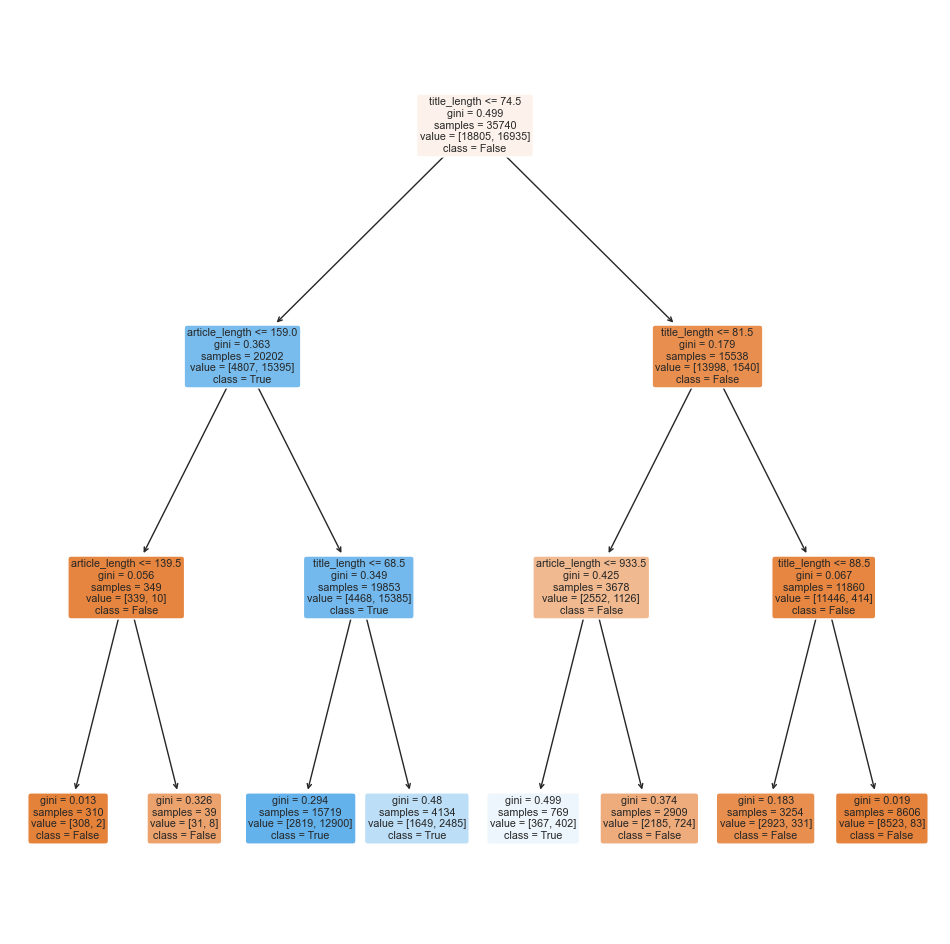

In [37]:
multivariate = pd.DataFrame(news_updated[['article_length', 'title_length', 'sentiment_text_score', 'sentiment_title_score']])
X_train6, X_test6, y_train6, y_test6 = train_test_split(multivariate, True_or_False, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train6.shape, X_train6.shape)
print("Test Set  :", y_test6.shape, X_test6.shape)

dectree6 = DecisionTreeClassifier(max_depth=3) 
dectree6.fit(X_train6, y_train6)   

f = plt.figure(figsize=(12, 12))
plot_tree(dectree6, filled=True, rounded=True, 
          feature_names= X_train6.columns, 
          class_names=["False","True"])
plt.show()

y_train_pred6 = dectree6.predict(X_train6)
y_test_pred6 = dectree6.predict(X_test6)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8325965304980414

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.833034914950761



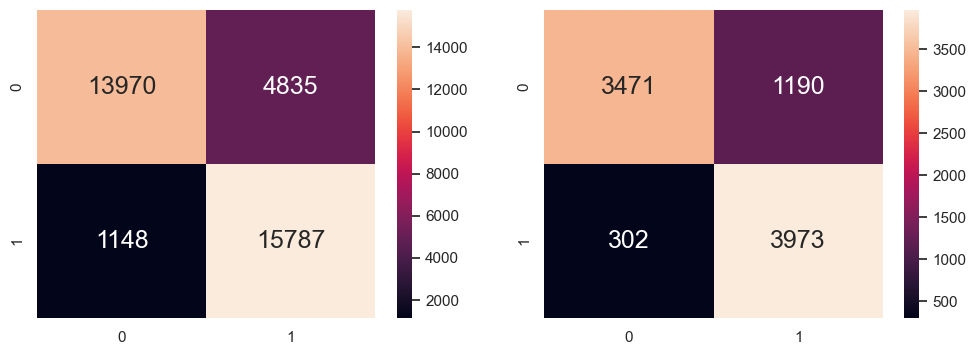

In [38]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree6.score(X_train6, y_train6))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree6.score(X_test6, y_test6))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train6, y_train_pred6),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test6, y_test_pred6), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()


In [39]:
print("The rates for the train data are:")
analyse(y_train6, y_train_pred6)
print("The rates for the test data are:")
analyse(y_test6, y_test_pred6)

The rates for the train data are:
The true positive rate is  0.932211396516091
The false positive rate is  0.25711247008774263

The rates for the test data are:
The true positive rate is  0.9293567251461988
The false positive rate is  0.25531001930916114



Next we will use only sentiment_title_score and sentiment_text_score, our two highest individually performing variables in terms of classification accuracy, as part of a multivariate decision tree for comparison's sake.

Train Set : (35740, 1) (35740, 2)
Test Set  : (8936, 1) (8936, 2)


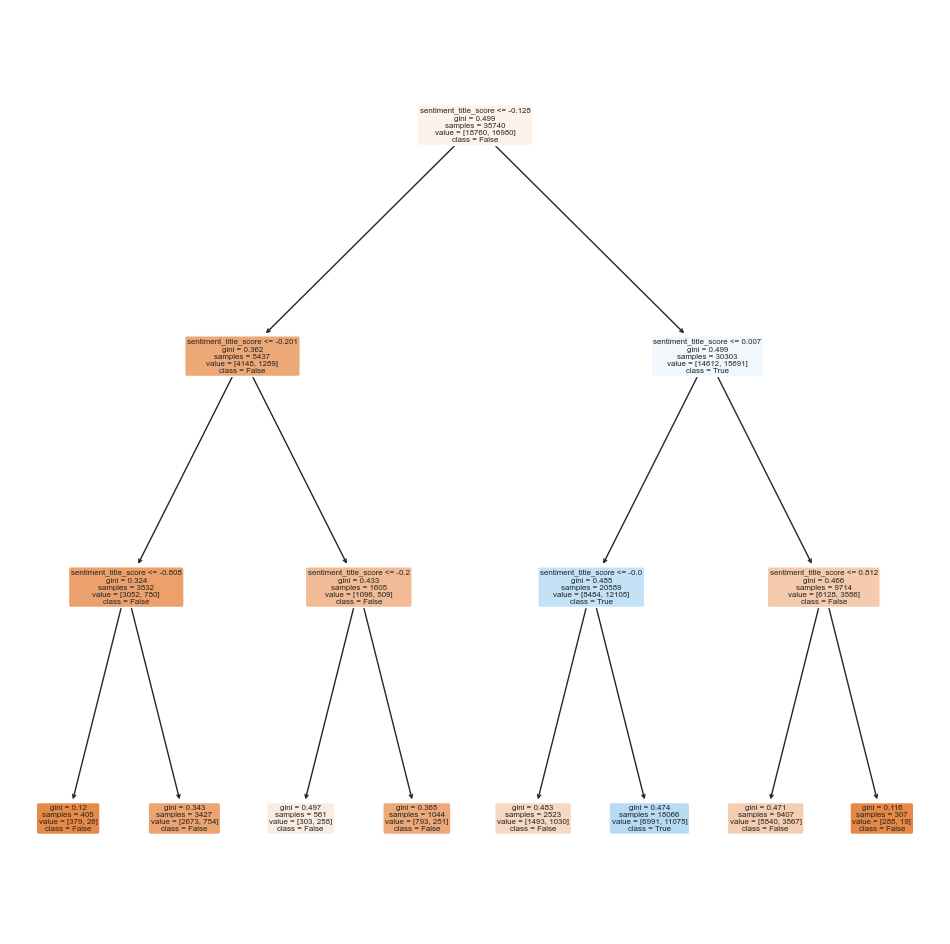

In [49]:
multivariate2 = pd.DataFrame(news_updated[['sentiment_text_score', 'sentiment_title_score']])
X_train7, X_test7, y_train7, y_test7 = train_test_split(multivariate2, True_or_False, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train7.shape, X_train7.shape)
print("Test Set  :", y_test7.shape, X_test7.shape)

dectree7 = DecisionTreeClassifier(max_depth=3) 
dectree7.fit(X_train7, y_train7)   

f = plt.figure(figsize=(12, 12))
plot_tree(dectree6, filled=True, rounded=True, 
          feature_names= X_train7.columns, 
          class_names=["False","True"])
plt.show()

y_train_pred7 = dectree7.predict(X_train7)
y_test_pred7 = dectree7.predict(X_test7)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6382484611080023

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6383169203222918



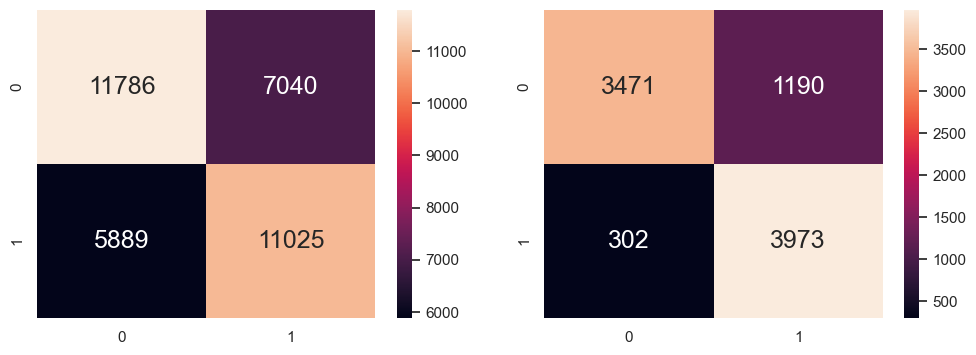

In [50]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree7.score(X_train7, y_train7))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree7.score(X_test7, y_test7))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train7, y_train_pred7),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test6, y_test_pred6), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [51]:
print("The rates for the train data are:")
analyse(y_train7, y_train_pred7)
print("The rates for the test data are:")
analyse(y_test7, y_test_pred7)

The rates for the train data are:
The true positive rate is  0.651826888967719
The false positive rate is  0.37395091894188887

The rates for the test data are:
The true positive rate is  0.6522346368715084
The false positive rate is  0.3745689655172414



For clarity we summarise the results as follows:
<br>
**For the first model with all four numeric variables:**
<br>
<br>
Classification Accuracy for Train Dataset : 0.8325965304980414
<br>
<br>
Classification Accuracy for Test Dataset: 0.833034914950761
<br>
<br>
The rates for the train data are:
<br>
The true positive rate is  0.932211396516091
<br>
The false positive rate is  0.25711247008774263
<br>
<br>
The rates for the test data are:
<br>
The true positive rate is  0.9293567251461988
<br>
The false positive rate is  0.25531001930916114
<br>
<br>
<br>
**For the second model with only sentiment_test_score and sentiment_title_score:**
<br>
<br>
Classification Accuracy for Train Dataset : 0.6382484611080023
<br>
<br>
Classification Accuracy for Test Dataset: 0.6383169203222918
<br>
<br>
The rates for the train data are:
<br>
The true positive rate is  0.651826888967719
<br>
The false positive rate is  0.37395091894188887
<br>
<br>
The rates for the test data are:
<br>
The true positive rate is  0.6522346368715084
<br>
The false positive rate is  0.3745689655172414
<br>
<br>
<br>

As you can see, the better multivariate model is the one with all four numeric predictors, and by quite a significant margin as well. When we compare it to the univariate decision trees, it still performs **better than sentiment_text_score.**
<br>
<br>
**Hence the best decision tree model is the multivariate model that uses all four numeric predictor variables.**

## Categorical Variables

**We make a decision to not analyse any categorical variables. This is because for all the categorical variables, the updated news dataset has derived numeric variables that help us perform further exploratory analysis. Furthermore, if we look at the variables sentiment_text_label and sentiment_title_label, the categories used to cluster the data is more broad than the score variables that these are derived from. Hence, we choose to omit these as predictor variables since we've already performed decision tree analysis on the more nuanced and accurate score predictor variables.**

## Random Forest Classification

## Title and Text Vectorisation

In [19]:
# First remove duplicates on title and text columns 
update = updated_news.drop_duplicates(subset={'title', 'text'})

# Assigning title and text as predictor variables and True/False as response variable
x=updated_news[['title', 'text']]
y=updated_news['True/False']

In [20]:
# vectorizing text column, set to 50 most commonly-appeared words
from sklearn.feature_extraction.text import TfidfVectorizer
vec= TfidfVectorizer(max_features=50)
text_matrix=vec.fit_transform(x['text'])

# converting to dataframe text_df
text_df = pd.DataFrame(data=text_matrix.todense(), columns = vec.get_feature_names_out())

# vectorizing title column, set to 50 most commonly-appeared words
vec2=TfidfVectorizer(max_features=50)
title_matrix=vec2.fit_transform(x['title'])

# converting to dataframe title_df
title_df=pd.DataFrame(data=title_matrix.todense(), columns = vec2.get_feature_names_out())

# renaming columns to avoid overlapping with text_df
for i in title_df.columns:
    title_df=title_df.rename(columns={i: i+" (title)"})


In [21]:
# concatenate title_df, text_df and x
concat= pd.concat([title_df, text_df], axis=1)
concat.shape
x=pd.concat([x, concat], axis=1)

# drop title and text column
x=x.drop(['title', 'text'], axis=1)
x.head()

,about (title),after (title),against (title),and (title),are (title),as (title),at (title),be (title),bill (title),by (title),...,us,was,we,were,which,who,will,with,would,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043216,0.000000,0.177641,0.119459,0.000000,0.079583,0.394769
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059807,0.141021,0.000000,0.063995,0.000000,0.000000,0.000000,0.220070,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.122080,0.078408,0.041550,0.040390,0.102477,0.076569,0.200037,0.000000,0.332109
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038605,0.121370,0.038976,0.000000,0.080311,0.067920,0.114186,0.028410,0.114105,0.094336
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098455,0.051589,0.099401,0.140465,0.034136,0.144349,0.032357,0.000000,0.000000,0.000000


In [22]:
# importing Random Forest Classifier model and splitting the data into train and test dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

random=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
x_train.shape, x_test.shape

((35740, 100), (8936, 100))

In [23]:
# fitting the train dataset into the model 
random.fit(x_train,y_train)
random.score(x_test, y_test)

0.9171888988361683

In [24]:
# displaying the classification report of the model 
from sklearn.metrics import classification_report 
y_test_pred = random.predict(x_test)
clr=classification_report(y_test, y_test_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4627
           1       0.92      0.91      0.91      4309

    accuracy                           0.92      8936
   macro avg       0.92      0.92      0.92      8936
weighted avg       0.92      0.92      0.92      8936



In [25]:
# cross validaiion to reduce the problem of over-fitting 

from sklearn.model_selection import cross_val_score

print("Cross Validation using Accuracy Scores")
cross_random = cross_val_score(random, x, y, cv=5, scoring="accuracy")
print(cross_random)
print("Average accuracy: ", np.average(cross_random))

Cross Validation using Accuracy Scores
[0.93050582 0.93508674 0.90621153 0.88908786 0.87207611]
Average accuracy:  0.9065936092709757


<AxesSubplot:>

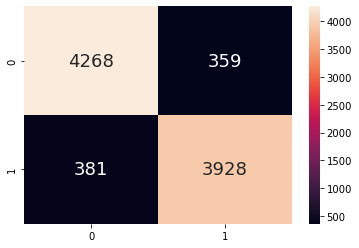

In [26]:
# plot the confusion matrix for test dataset

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

<AxesSubplot:title={'center':'Cross-Validation Results on Text and Title columns'}, ylabel='Accuracy'>

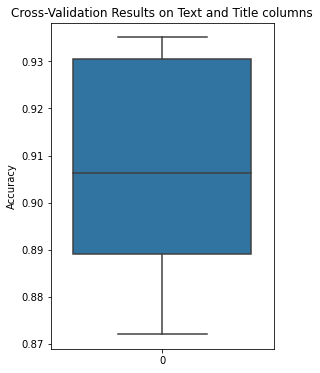

In [38]:
# plot the boxplot for cross-validation results

fig, axes = plt.subplots(1,1,figsize = (4,6))
plt.title("Cross-Validation Results on Text and Title columns")
plt.ylabel("Accuracy")
sb.boxplot(data=cross_random)

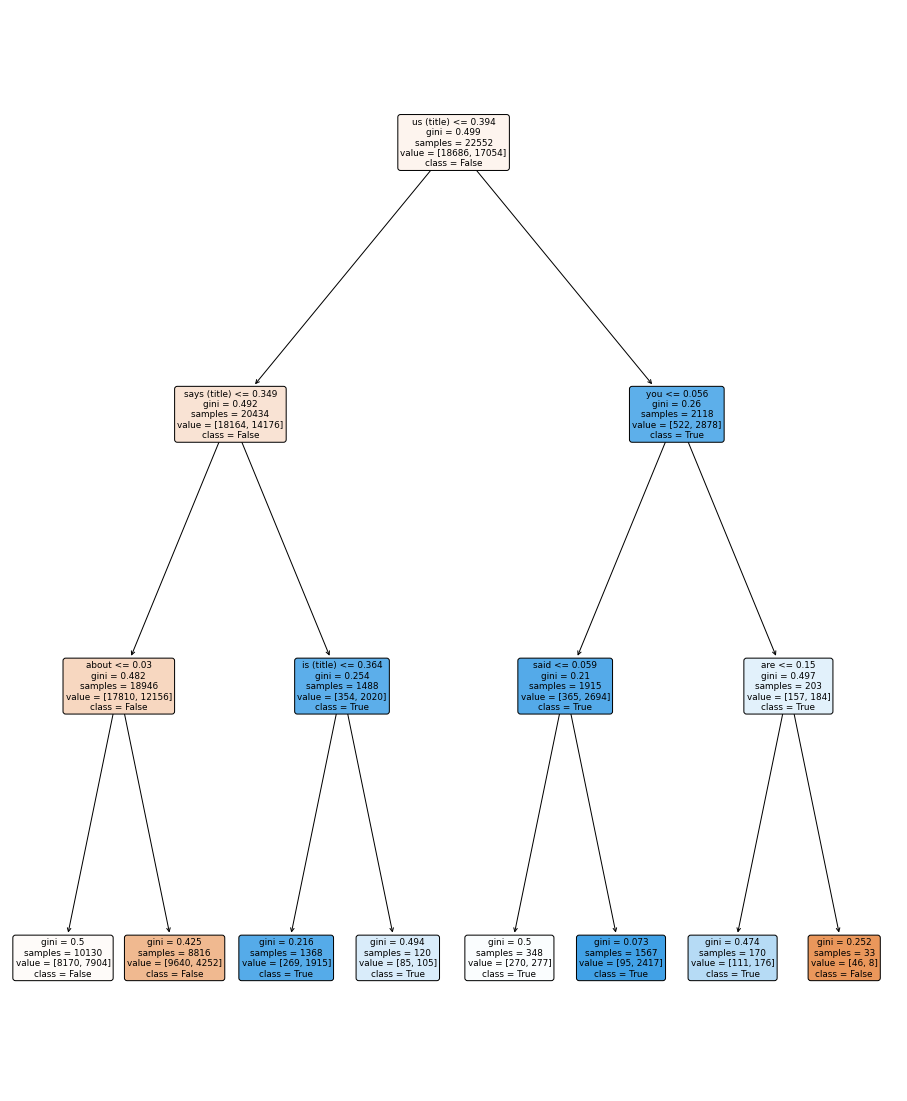

In [27]:
# plot one of the decision tree to visualize the process

from sklearn.tree import plot_tree
fig, axes = plt.subplots(1,1,figsize = (16,20))
plot_tree(random.estimators_[0], filled=True, rounded=True, feature_names=x.columns, class_names=["False", "True"]) 
plt.show()

##### From our results, we observe a relatively high accuracy score for both train and test dataset, however, we ought to be careful because this could also reflect a problem of overfitting which is especially common with vectorization

## Multi-Variate Random Forest Classification on Non-Textual Variables

In [28]:
x=updated_news[['title_length', 'article_length', 'sentiment_title_score', 'sentiment_text_score']]
y=updated_news['True/False']
x.head()

,title_length,article_length,sentiment_title_score,sentiment_text_score
0,77,2588,-0.181818,0.087387
1,69,1836,-0.250000,-0.005004
2,88,3301,0.000000,0.006325
3,75,2520,-0.500000,0.001111
4,70,2288,0.000000,-0.011722


In [29]:
# importing Random Forest Classifier model and splitting the data into train and test dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

random2=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
x_train.shape, x_test.shape

((35740, 4), (8936, 4))

In [30]:
# fitting the train dataset into the model 
random2.fit(x_train,y_train)
random2.score(x_test, y_test)

0.8347135183527306

In [31]:
# displaying the classification report of the model 
from sklearn.metrics import classification_report 
y_test_pred = random2.predict(x_test)
clr=classification_report(y_test, y_test_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4724
           1       0.78      0.90      0.84      4212

    accuracy                           0.83      8936
   macro avg       0.84      0.84      0.83      8936
weighted avg       0.84      0.83      0.83      8936



In [32]:
# cross validaiion to reduce the problem of over-fitting 

from sklearn.model_selection import cross_val_score

print("Cross Validation using Accuracy Scores")
cross_random2 = cross_val_score(random, x, y, cv=5, scoring="accuracy")
print(cross_random2)
print("Average accuracy: ", np.average(cross_random2))


Cross Validation using Accuracy Scores
[0.83807073 0.80279799 0.88606603 0.84443201 0.78802462]
Average accuracy:  0.8318782748578588


<AxesSubplot:>

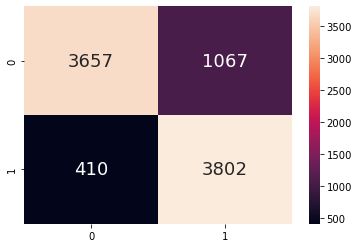

In [33]:
# plot the confusion matrix for test dataset

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

<AxesSubplot:title={'center':'Cross-Validation Results on Non-Textual Columns'}, ylabel='Accuracy'>

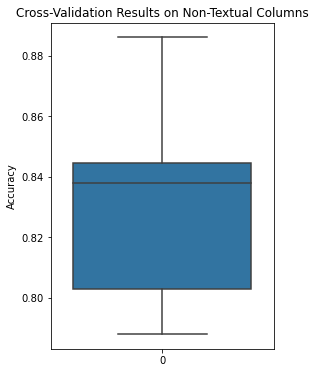

In [39]:
# plot the boxplot for cross-validation results

fig, axes = plt.subplots(1,1,figsize = (4,6))
plt.title("Cross-Validation Results on Non-Textual Columns")
plt.ylabel("Accuracy")
sb.boxplot(data=cross_random2)

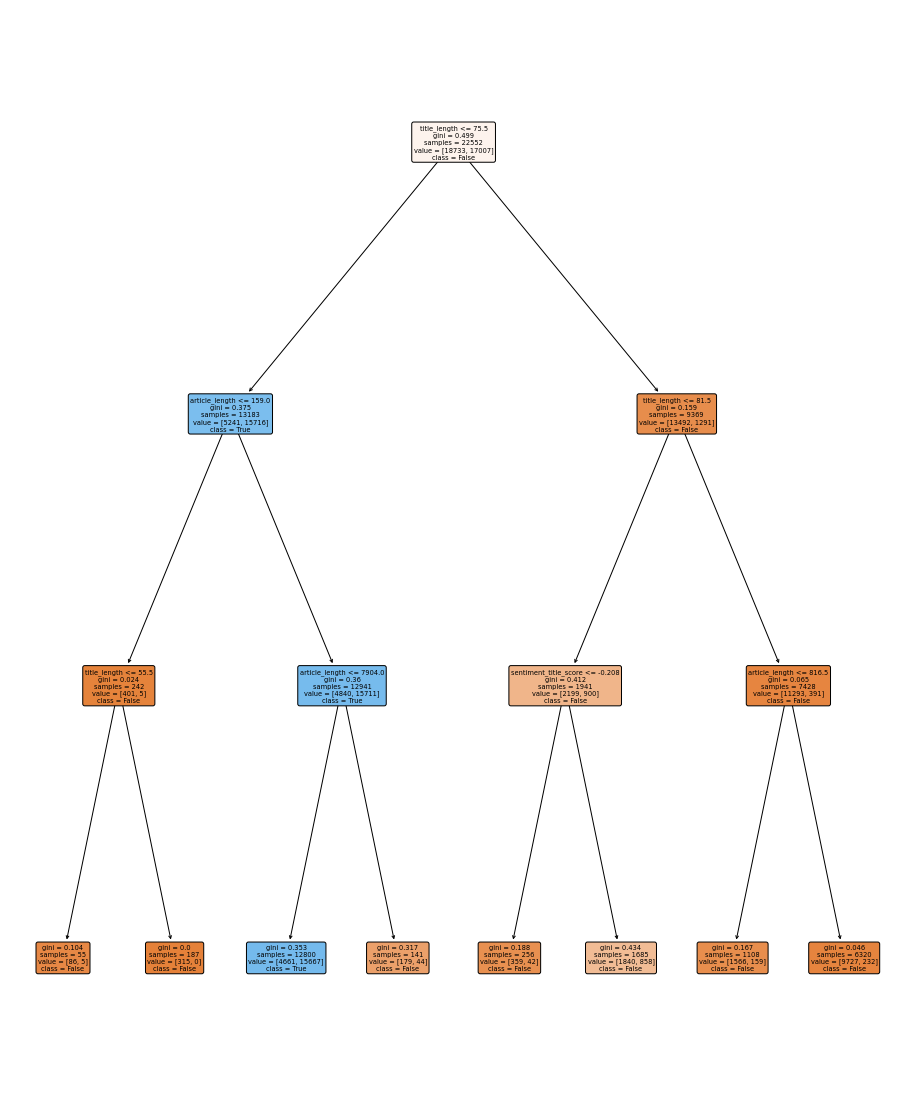

In [34]:
# plot one of the decision tree to visualize the process

fig, axes = plt.subplots(1,1,figsize = (16,20))
plot_tree(random2.estimators_[0], filled=True, rounded=True, feature_names=x.columns, class_names=["False", "True"]) 
plt.show()

The following mean accuracy scores are obtained: 

**On train dataset = 83.9%  
On test dataset = 83.5%**



## XGBoost Deep Learning (Text)

### Binary Cross-Entrophy Loss Function for Binary Classification Problems
It is a measure of the difference between the predicted probabilities and the true class labels for each class. During training, the cross-entropy loss is minimised, indicating that the model is learning to correctly classify the input data.

### TF-IDF
We vectorize the text using TF-IDF to convert the text data into a vector of numerical features. The 'max_features' parameter is set to be 50, to keep our parameters the same throughout our models.

### XGBoost Model
We set the number of trees in the model to be 100 and max depth to be 3, similar to our Binary Tree Classification and Random Forest. We used learning rate to prevent overfitting and binary logistic to be the loss function.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Separate the text (X) and labels (y)
X = new_news_data['text']
y = new_news_data['True/False']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

In [ ]:
# Train the model
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
import pickle
with open('news_classifier_text.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('news_classifier_text.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8773500447627574


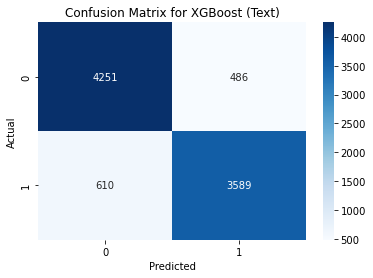

<Figure size 432x288 with 2 Axes>

In [ ]:
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost (Text)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost Deep Learning (Title)

Vectorize the text using TF-IDF: This line of code creates an instance of the TfidfVectorizer class, which is used to convert the text data into a vector of numerical features. The 'max_features' parameter sets the maximum number of features to be extracted from the text data, and 'fit_transform' method is used to transform the training data, and 'transform' method is used to transform the testing data.

In [ ]:
# Separate the text (X) and labels (y)
X = new_news_data_2['title']
y = new_news_data_2['True/False']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

In [ ]:
# Train the model
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
import pickle
with open('news_classifier_title.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import pickle
with open('news_classifier_title.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7749552372426142


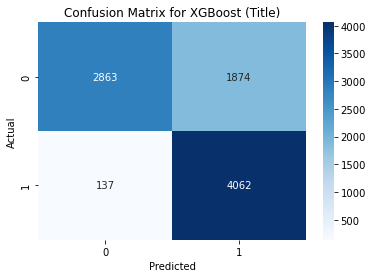

<Figure size 432x288 with 2 Axes>

In [ ]:
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost (Title)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Analysis of Results
As seen from the deep learning model, the test accuracy are:
### 87.73% for text input
### 77.49% for title input

A reason for high accuracy could be due to overfitting: 
As our test results are too accurate, it is possible that our model has overfit to the training data and is memorising it, rather than generalizing to new, unseen data. This can also happen due to many features extracted. We planned to try regularisation techniques, such as dropout or weight decay, to prevent overfitting in the future.

However, we used the same parameters of tokenising 50 words as we did in Random Forest and Binary Tree Classification. Using text alone with XGBoost Model has shown to be accurate in detecting real/fake news. Moreover,  this model is not biased towards one class as shown in the confusion matrix.

To prevent potential overfitting, we tried 5-fold cross validation.

## XGBoost with Cross Validation (Text)

### Cross-Validation
We used cross_val_score() function to split the data into 5 subsets, trains the model on 4 of the subsets, and evaluates its performance on the remaining subset. This process is repeated 5 times, with each subset serving as the test set once.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Separate the text (X) and labels (y)
X = new_news_data['text']
y = new_news_data['True/False']

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X_tfidf = tfidf.fit_transform(X)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_tfidf, y, cv=5)

# Calculate the average accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print('Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Accuracy: 0.8619835562620517
Standard Deviation: 0.02400265643639378


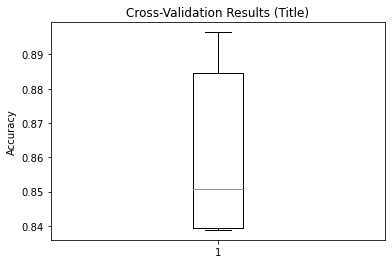

<Figure size 432x288 with 1 Axes>

In [ ]:
# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(scores)

# Set the labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Results (Title)')

# Show the plot
plt.show()

## XGBoost with Cross Validation (Title)

In [ ]:
# Separate the text (X) and labels (y)
X = new_news_data_2['title']
y = new_news_data_2['True/False']

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X_tfidf = tfidf.fit_transform(X)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_tfidf, y, cv=5)

# Calculate the average accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print('Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Accuracy: 0.7709068077966854
Standard Deviation: 0.032746090961030636


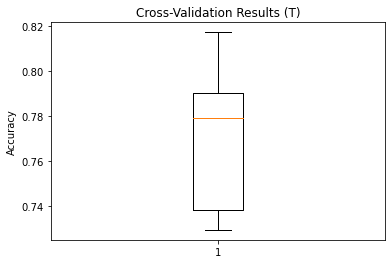

<Figure size 432x288 with 1 Axes>

In [ ]:
# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(scores)

# Set the labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Results (T)')

# Show the plot
plt.show()

## Analysis of Results
As seen from the 5-fold cross validation, the test accuracy are:
### Text input:
Accuracy: 0.862

Standard Deviation: 0.0240
### Title input:
Accuracy: 0.771

Standard Deviation: 0.0327


Since XGBoost consistently performs well on all of these subsets, it is less likely to be overfitting. Hence XGBoost is rather accurate to detect fake/real news from text input alone.

In [ ]:
news.to_csv('news_updated.csv', index=False)

# Deep Learning

In [2]:
# Load the data
news_data = pd.read_csv('news_updated.csv')
new_news_data = news_data.loc[:, ['text', 'True/False']]
new_news_data_2 = news_data.loc[:, ['title', 'True/False']]

### Pytorch Deep Learning (Text)

### Bidirectional Encoder Representations from Transformers
Using Pytorch, we decided to train deep learning models to predict the nature of the news (fake/real). We used BERT-base, uncased, a pre-trained language model and a BERT variant that was trained on a large text corpus using an unsupervised, bidirectional training objective. Hence, this model can learn contextual representations of words and sentences that capture their meaning as well as their relationships to other words and sentences.

### Adam Optimisation Algorithm for Neutral Networks
It is an adaptive learning rate optimization algorithm that computes individual learning rates for each parameter of the model. This enables it to converge more quickly and consistently hence it is suited to our dataset as it has a large number of parameters.

### CrossEntrophyLoss Function for Multi-Class Classification Problems
It is a measure of the difference between the predicted probabilities and the true class labels for each class. During training, the cross-entropy loss is minimised, indicating that the model is learning to correctly classify the input data.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

In [ ]:
# Define the custom dataset
class NewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx]['text']
        label = self.data.iloc[idx]['True/False']
        
        encoding = self.tokenizer.encode_plus(
            text, 
            add_special_tokens=True, 
            truncation=True, 
            max_length=self.max_length,
            return_token_type_ids=False,
            pad_to_max_length=True, 
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the model
class NewsClassifier(nn.Module):
    def __init__(self, bert_model):
        super(NewsClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 2)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc1(pooled_output)
        
        return logits

In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(new_news_data, test_size=0.2, random_state=42)

# Initialize the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
model = NewsClassifier(bert_model).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Initialize the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Initialize the datasets and data loaders
train_dataset = NewsDataset(train_data, tokenizer, max_length=512)
val_dataset = NewsDataset(val_data, tokenizer, max_length=512)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
# Train the model
best_val_loss = float('inf')
best_epoch = 0
patience = 5
current_patience = 0

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_accuracy = 0.0
    
    # Train the model on the training set
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item() * input_ids.size(0)

/Users/timothylee/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
torch.save(model.state_dict(), 'news_classifier_text.pth')

In [ ]:
def evaluate(model, test_loader, criterion):
    # Get the predicted labels for the test set
    model.eval()
    y_pred = []
    y_true = []
    test_loss = 0.0
    test_accuracy = 0.0
    with torch.no_grad():
        for batch in tqdm(test_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * input_ids.size(0)
            
            _, predicted = torch.max(outputs, 1)

            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
            
            test_accuracy += torch.sum(predicted == labels.data)

    # Calculate the confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.matshow(conf_mat, cmap=plt.cm.Blues)
    plt.colorbar()

    # Add labels to the plot
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), horizontalalignment='center', verticalalignment='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    
    print('Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format(test_loss, test_accuracy))
    return test_loss, test_accuracy

In [ ]:
model = NewsClassifier(bert_model).to(device)  # create an instance of your model class
model.load_state_dict(torch.load('news_classifier_text.pth'))
model.eval()  # set the model to evaluation mode

NewsClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru



Test Loss: 0.0038, Test Accuracy: 0.9993






100%|██████████| 559/559 [02:48<00:00,  3.32it/s]






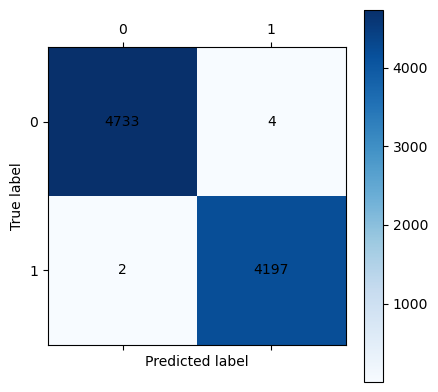

<Figure size 480x480 with 2 Axes>

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = evaluate(model, val_loader, nn.CrossEntropyLoss())

### Pytorch Deep Learning (Title)

In [ ]:
# Define the custom dataset
class NewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx]['title']
        label = self.data.iloc[idx]['True/False']
        
        encoding = self.tokenizer.encode_plus(
            text, 
            add_special_tokens=True, 
            truncation=True, 
            max_length=self.max_length,
            return_token_type_ids=False,
            pad_to_max_length=True, 
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the model
class NewsClassifier(nn.Module):
    def __init__(self, bert_model):
        super(NewsClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 2)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc1(pooled_output)
        
        return logits

In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(new_news_data_2, test_size=0.2, random_state=42)

# Initialize the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
model = NewsClassifier(bert_model).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Initialize the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Initialize the datasets and data loaders
train_dataset = NewsDataset(train_data, tokenizer, max_length=100)
val_dataset = NewsDataset(val_data, tokenizer, max_length=100)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
# Train the model
best_val_loss = float('inf')
best_epoch = 0
patience = 5
current_patience = 0

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_accuracy = 0.0
    
    # Train the model on the training set
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item() * input_ids.size(0)

In [ ]:
torch.save(model.state_dict(), 'news_classifier_title.pth')

In [ ]:
model = NewsClassifier(bert_model).to(device)  # create an instance of your model class
model.load_state_dict(torch.load('news_classifier_title.pth'))
model.eval()  # set the model to evaluation mode

NewsClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru



Test Loss: 0.1098, Test Accuracy: 0.9781






  0%|          | 0/140 [00:00<?, ?it/s]/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 140/140 [00:21<00:00,  6.59it/s]






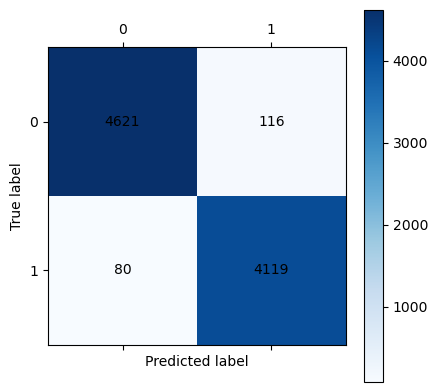

<Figure size 480x480 with 2 Axes>

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = evaluate(model, val_loader, nn.CrossEntropyLoss())

### Analysis of Results
As seen from the deep learning model, the test accuracy are:
#### 99.93% for text input
#### 97.81% for title input

Some reasons for high accuracy include:
1) The BERT model was pre-trained on a large corpus of text using a sequence length of up to 512 tokens. Since we trained the text input to capture more context and information up to 512 tokens, it might be the reason for making such accurate predictions. 

2) Overfitting: As our test results are too accurate, it is possible that our model has overfit to the training data and is memorising it, rather than generalising to new, unseen data. This can also happen due to many features extracted. We planned to try regularisation techniques, such as dropout or weight decay, to prevent overfitting in the future. 

There was a big limitation to this model as it required a computer with high number of GPU cores to train (taking 6-8hours). Since we do not have such high computational power all the time, we could not try other improvements.

### Keras Deep Learning (Text)

### Adam Optimisation Algorithm for Neutral Networks
It is an adaptive learning rate optimization algorithm that computes individual learning rates for each parameter of the model. This enables it to converge more quickly and consistently hence it is suited to our dataset as it has a large number of parameters.

### Binary Cross-Entrophy Loss Function for Binary Classification Problems
It is a measure of the difference between the predicted probabilities and the true class labels for each class. During training, the cross-entropy loss is minimised, indicating that the model is learning to correctly classify the input data.

### Tokenizer and Padding
The tokenizer is fit on the training data using the fit_on_texts method, which creates a vocabulary of the top 50 common words in the training set. Additionallu, the sequences are then padded to ensure that all sequences have the same length.

### Sequential Model
The model has an embedding layer with an input dimension of 50, an output dimension of 64, and an input length of 1000. This layer converts the integer word indices into dense vector representations. The model also has an LSTM layer with 64 units, a dropout rate of 0.2, and a recurrent dropout rate of 0.2. Finally, the model has a dense output layer with a single unit and a sigmoid activation function, which produces a probability between 0 and 1 for binary classification.

In [3]:
import tensorflow as tf
tf.keras.backend.set_image_data_format("channels_last")
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load the data
news_data = pd.read_csv('news_updated.csv')
new_news_data = news_data.loc[:, ['text', 'True/False']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_news_data['text'], new_news_data['True/False'], test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=1000)
X_test = pad_sequences(X_test, maxlen=1000)

# Define model
model = Sequential()
model.add(Embedding(input_dim=50, output_dim=64, input_length=1000))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

In [ ]:
# Save model
model.save('news_classifier_text.h5')

In [8]:
model = load_model('news_classifier_text.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 64)          3200      
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 36,289
Trainable params: 36,289
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Test model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

280/280 [==============================] - 39s 137ms/step
Accuracy: 0.9422560429722471


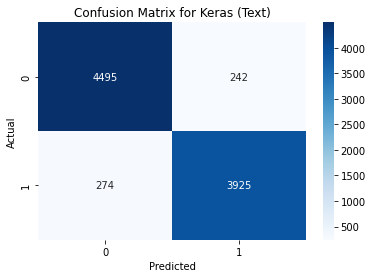

In [9]:
confusion = confusion_matrix(y_test, y_pred_binary)
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Keras (Text)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Keras Deep Learning (Title)

In [ ]:
# Load the data
news_data = pd.read_csv('news_updated.csv')
new_news_data_2 = news_data.loc[:, ['title', 'True/False']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_news_data_2['title'], new_news_data_2['True/False'], test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Define model
model = Sequential()
model.add(Embedding(input_dim=50, output_dim=64, input_length=100))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

In [ ]:
# Save model
model.save('news_classifier_title.h5')

In [ ]:
model = load_model('news_classifier_title.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           3200      
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 36,289
Trainable params: 36,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Test model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

280/280 [==============================] - 10s 31ms/step
Accuracy: 0.8581020590868398


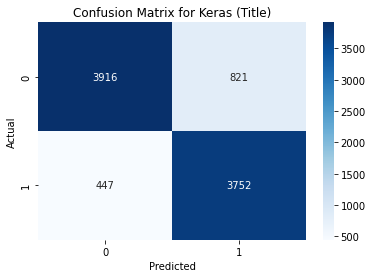

In [ ]:
confusion = confusion_matrix(y_test, y_pred_binary)
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Keras (Title)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Analysis of Results
As seen from the deep learning model, the test accuracy are:
#### 94.22% for text input
#### 85.81% for title input

A reason for high accuracy could be due to overfitting: 
As our test results are too accurate, it is possible that our model has overfit to the training data and is memorising it, rather than generalizing to new, unseen data. This can also happen due to many features extracted. We planned to try regularisation techniques, such as dropout or weight decay, to prevent overfitting in the future.

However, we used the same parameters of tokenising 50 words as we did in Random Forest and Binary Tree Classification. Using text alone with Keras Model has shown to be accurate in detecting real/fake news. Moreover,  this model is not biased towards one class as shown in the confusion matrix.

One limitation we faced as also due limited computation power hence we could only train 10 epochs. Since we do not have such high computational power all the time, we could not try to cross validate or plot learning curves.

This brings us to try XGBoost, as it can be parallelised across multiple CPU cores to accelerate training. This means that each core can work on a subset of the data at the same time, which reduces the overall training time. We will then try to cross validate our results with 5 folds.